***Fatemeh Amiri***

**student number: 40202424**

**Mini Project3 _ Machine Learning _ Dr Aliyari**

*spring 2024*

#Question1

In this task, our goal is to experiment with the SVM algorithm on the famous Iris dataset. First, we will load the dataset and obtain its statistical and visual information to assess the feasibility of dimensionality reduction. Then, using SVM with a linear kernel, we will classify the data, and plot the confusion matrix and decision boundaries in a two-dimensional space. Next, we will repeat this process using polynomial kernels and the scikit-learn library for degrees 1 to 10, analyzing and comparing the results. Additionally, we will visualize the principal feature separations and present the results in a GIF file. Finally, we will implement the SVM algorithm from scratch without using the scikit-learn library, reporting its accuracy for degrees 1 to 10 and comparing the results with the previous section. We will also visualize the principal feature separations for these degrees and present the results in a GIF file.

##import libraries:

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
import scipy.io
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, jaccard_score, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.utils import shuffle
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
import __main__
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

##Part1

load dataset:

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].map(dict(enumerate(iris.target_names)))
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target target_name  
0         0      setosa  
1         0      setosa  
2         0      setosa  
3         0      setosa  
4         0      setosa  
..      ...         ...  
145       2   virginica  
146       2   virginica  
147       2   virginica  
148       2   virginica  
149       2   virginica  

[150 rows x 6 columns]

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
len(iris.feature_names)

4

Checking the balance!

In [7]:
df['target_name'].value_counts()

target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='target_name', ylabel='count'>

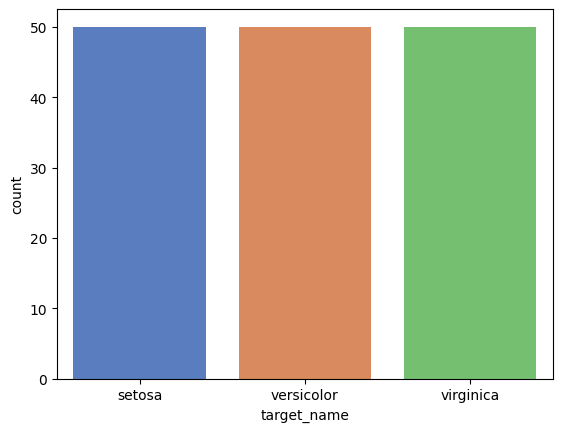

In [6]:
sns.countplot(x='target_name',data=df, palette="muted")

Statistical features:

In [8]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

Separation of each class!

In [9]:
mean = df.groupby('target_name').mean()
mean

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target_name                                                           
setosa                   5.006             3.428              1.462   
versicolor               5.936             2.770              4.260   
virginica                6.588             2.974              5.552   

             petal width (cm)  target  
target_name                            
setosa                  0.246     0.0  
versicolor              1.326     1.0  
virginica               2.026     2.0

In [10]:
med = df.groupby('target_name').median()
med

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target_name                                                           
setosa                     5.0               3.4               1.50   
versicolor                 5.9               2.8               4.35   
virginica                  6.5               3.0               5.55   

             petal width (cm)  target  
target_name                            
setosa                    0.2     0.0  
versicolor                1.3     1.0  
virginica                 2.0     2.0

In [11]:
variance = df.groupby('target_name').var()
variance

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target_name                                                           
setosa                0.124249          0.143690           0.030159   
versicolor            0.266433          0.098469           0.220816   
virginica             0.404343          0.104004           0.304588   

             petal width (cm)  target  
target_name                            
setosa               0.011106     0.0  
versicolor           0.039106     0.0  
virginica            0.075433     0.0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


without missing values and Nan Values!

Display the distribution of features:

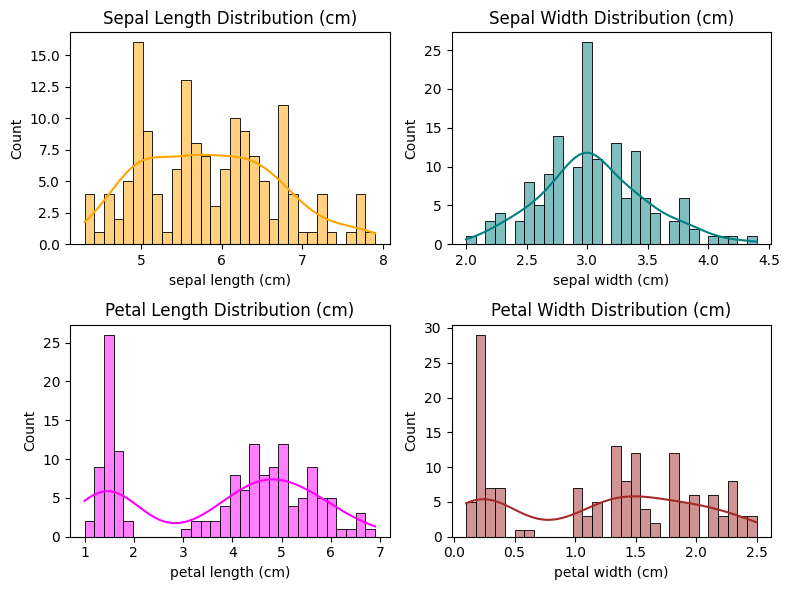

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

sns.histplot(df['sepal length (cm)'], bins=30, color='orange', ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Sepal Length Distribution (cm)')

sns.histplot(df['sepal width (cm)'], bins=30, color='teal', ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Sepal Width Distribution (cm)')

sns.histplot(df['petal length (cm)'], bins=30, color='magenta', ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Petal Length Distribution (cm)')

sns.histplot(df['petal width (cm)'], bins=30, color='brown', ax=axs[1, 1], kde=True)
axs[1, 1].set_title('Petal Width Distribution (cm)')

plt.tight_layout()
plt.show()

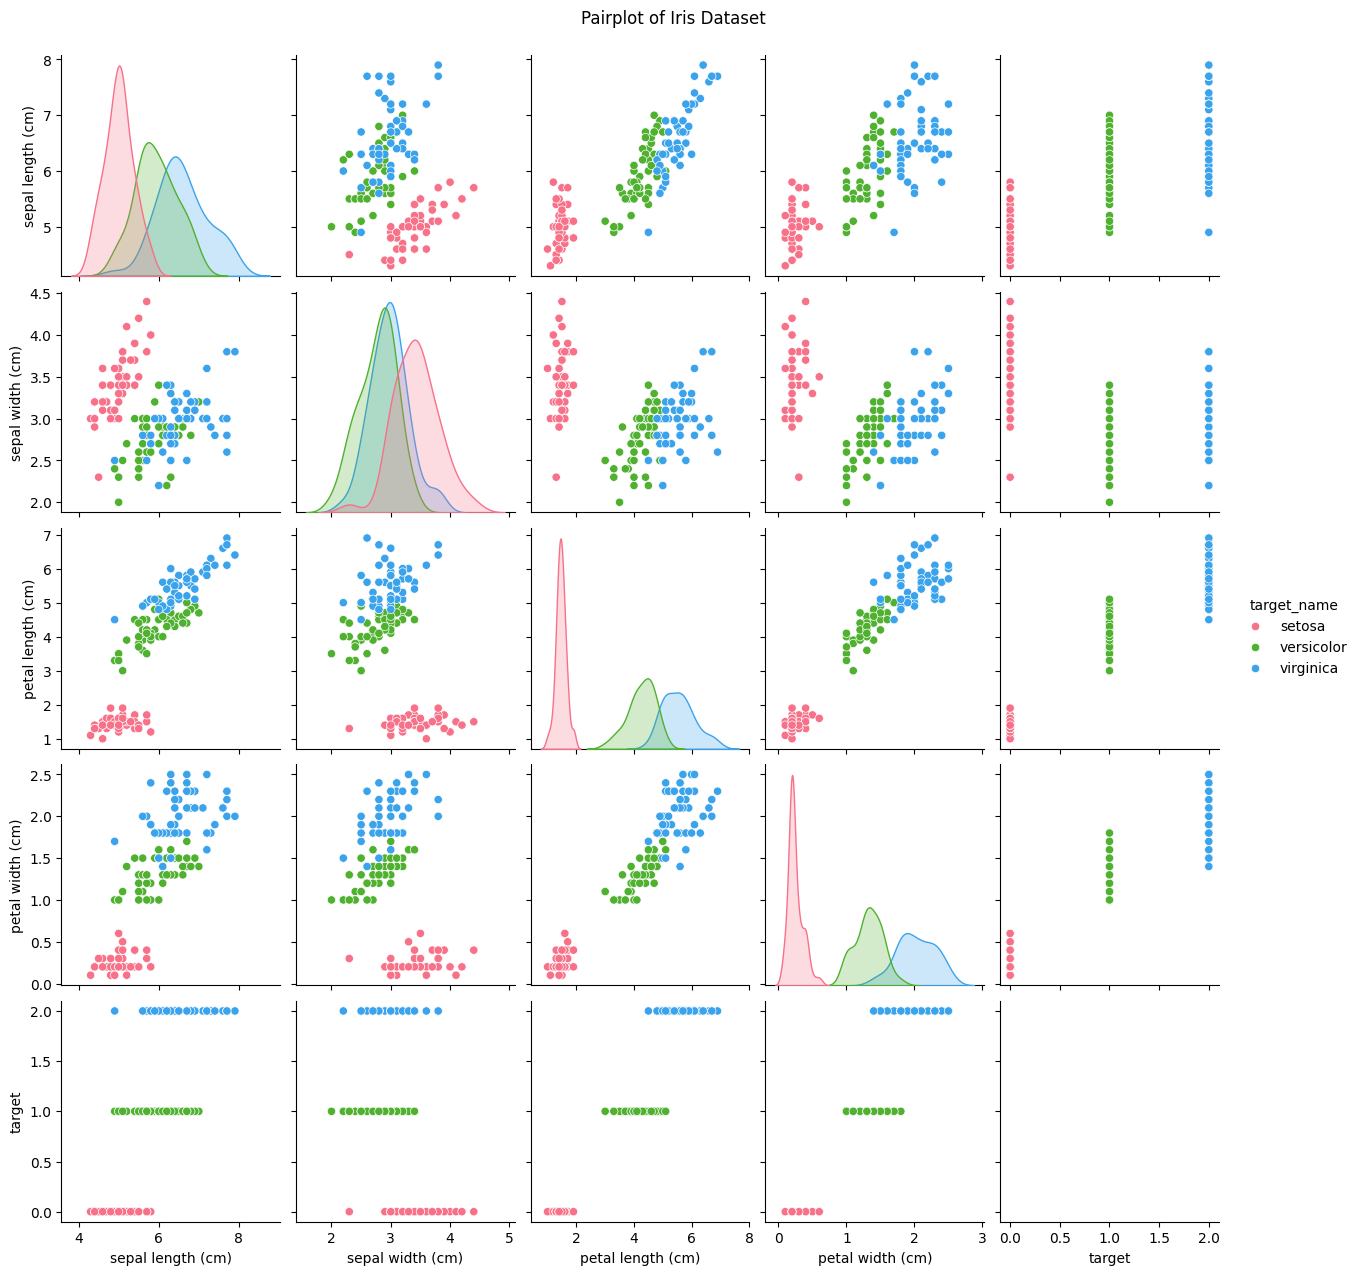

In [18]:
# Define a custom color palette
custom_palette = sns.color_palette("husl", 3)

# Plot the pairplot with the custom color palette
sns.pairplot(df, hue='target_name', palette=custom_palette)
plt.suptitle('Pairplot of Iris Dataset', y=1.02)  # Adjust the title position
plt.show()

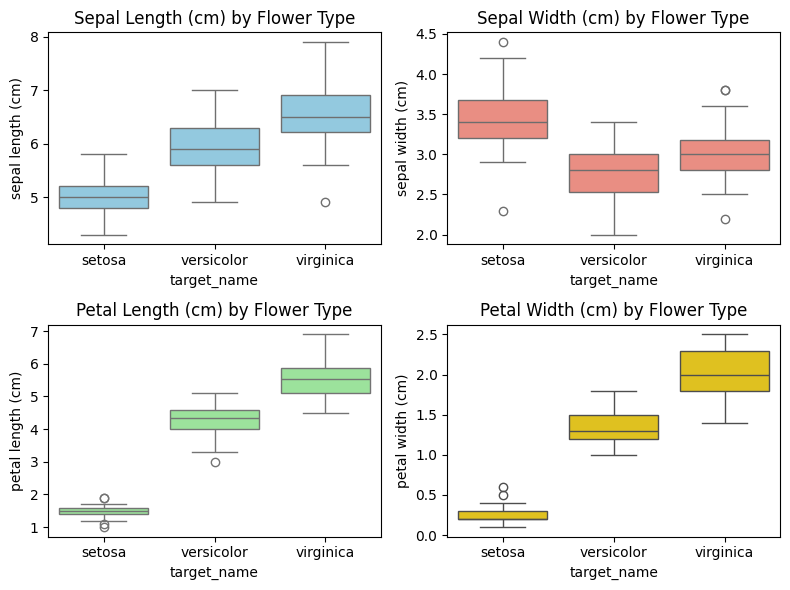

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

sns.boxplot(data=df, x='target_name', y='sepal length (cm)', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Sepal Length (cm) by Flower Type')

sns.boxplot(data=df, x='target_name', y='sepal width (cm)', ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Sepal Width (cm) by Flower Type')

sns.boxplot(data=df, x='target_name', y='petal length (cm)', ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Petal Length (cm) by Flower Type')

sns.boxplot(data=df, x='target_name', y='petal width (cm)', ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Petal Width (cm) by Flower Type')

plt.tight_layout()
plt.show()

*Correlation matrix*

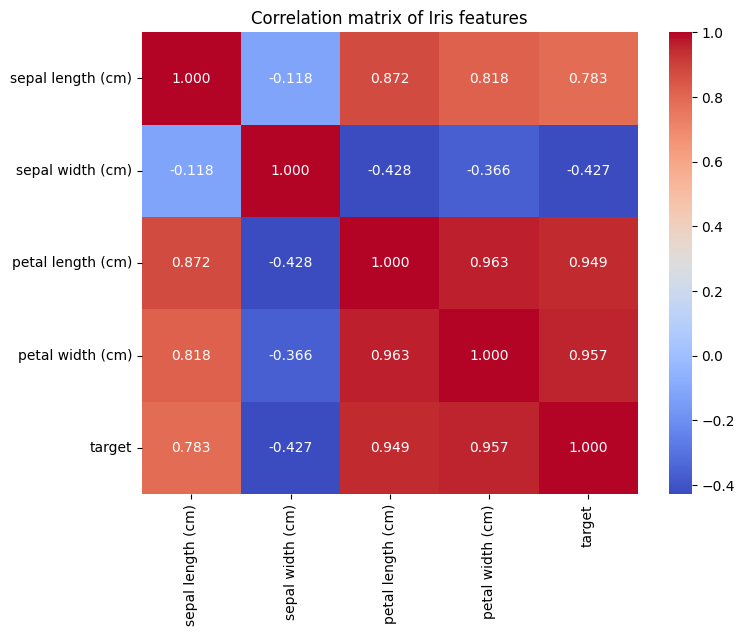

In [12]:
correlation_matrix = df.iloc[:, :-1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation matrix of Iris features')
plt.show()

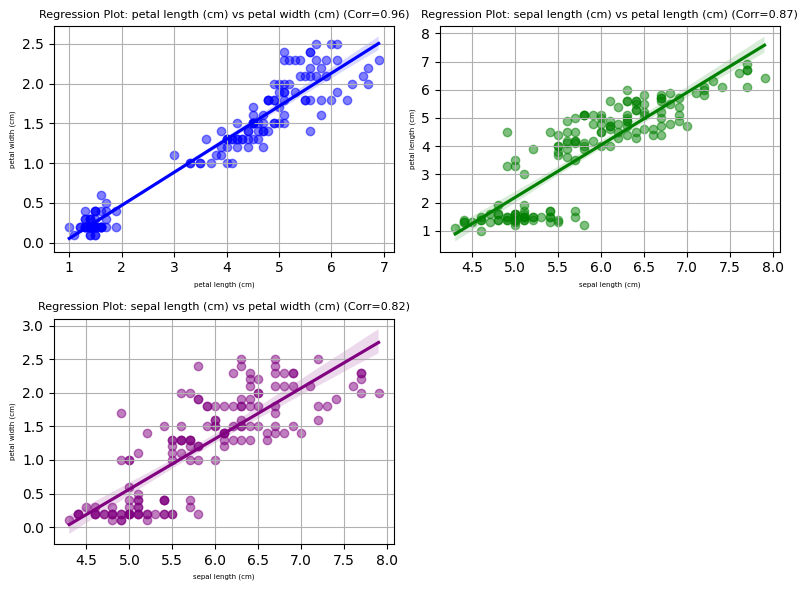

In [13]:
correlation_matrix = df.iloc[:, :-2].corr()

high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1].nlargest(3)

plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'purple']

for i, (pair, corr) in enumerate(high_corr_pairs.items()):
    plt.subplot(2, 2, i+1)
    x, y = pair
    sns.regplot(x=x, y=y, data=df, color=colors[i], scatter_kws={'alpha':0.5})
    plt.title(f'Regression Plot: {x} vs {y} (Corr={corr:.2f})', fontsize=8)
    plt.xlabel(x, fontsize=5)
    plt.ylabel(y, fontsize=5)
    plt.grid(True)

plt.tight_layout()
plt.show()

***t-SNE***

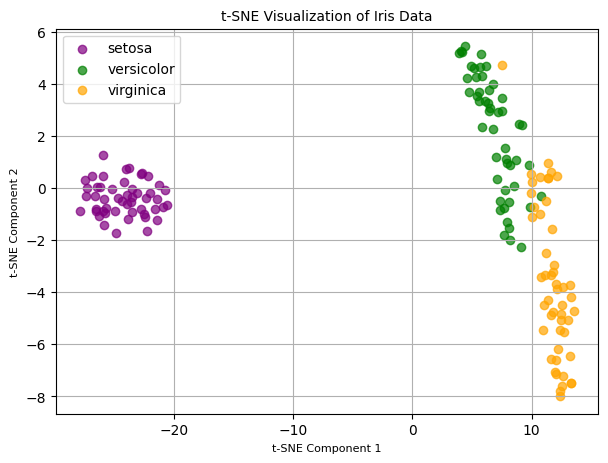

In [14]:
df_tsne = df.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=24)

X_tsne = tsne.fit_transform(df[iris.feature_names])

df_tsne['tsne-2d-one'] = X_tsne[:, 0]
df_tsne['tsne-2d-two'] = X_tsne[:, 1]

plt.figure(figsize=(7, 5))
colors = ['purple', 'green', 'orange']
for target_name, color in zip(iris.target_names, colors):
    indices_to_plot = df_tsne['target_name'] == target_name
    plt.scatter(df_tsne.loc[indices_to_plot, 'tsne-2d-one'],
                df_tsne.loc[indices_to_plot, 'tsne-2d-two'],
                label=target_name,
                color=color,
                alpha=0.7)

plt.xlabel('t-SNE Component 1', fontsize=8)
plt.ylabel('t-SNE Component 2', fontsize=8)
plt.title('t-SNE Visualization of Iris Data', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

***PCA***

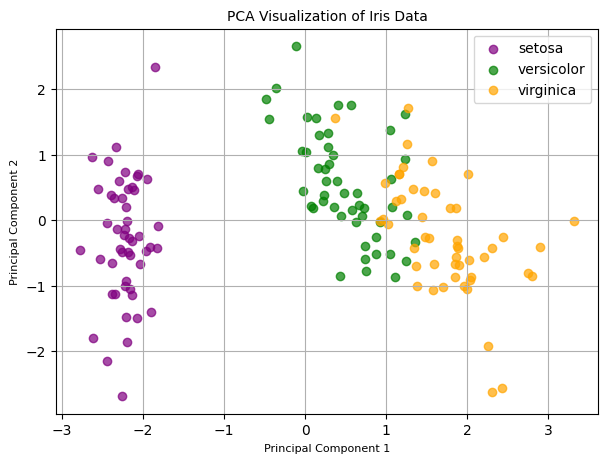

In [15]:
#method1

X = df[iris.feature_names].values
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

cov_matrix = np.cov(X_standardized, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Select the top k eigenvectors (here we select top 2 for 2D visualization)
k = 2
eigenvector_subset = sorted_eigenvectors[:, 0:k]
X_reduced = np.dot(X_standardized, eigenvector_subset)

df_pca = pd.DataFrame(data=X_reduced, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']
df_pca['target_name'] = df['target'].map(dict(enumerate(iris.target_names)))

plt.figure(figsize=(7, 5))
colors = ['purple', 'green', 'orange']
for target_name, color in zip(iris.target_names, colors):
    indices_to_plot = df_pca['target_name'] == target_name
    plt.scatter(df_pca.loc[indices_to_plot, 'PC1'],
                df_pca.loc[indices_to_plot, 'PC2'],
                label=target_name,
                color=color,
                alpha=0.7)

plt.xlabel('Principal Component 1', fontsize=8)
plt.ylabel('Principal Component 2', fontsize=8)
plt.title('PCA Visualization of Iris Data', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

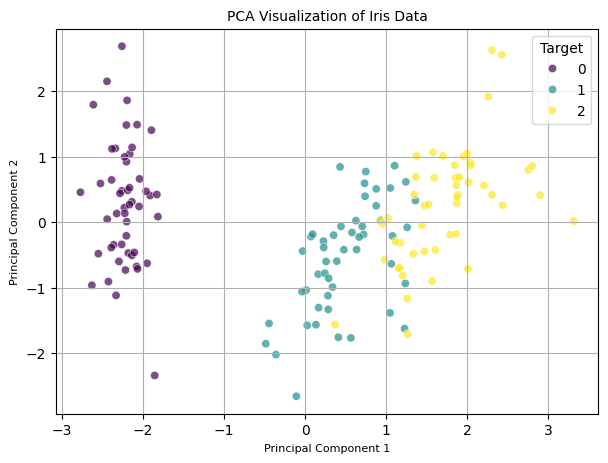

In [16]:
#PCA using sklearn   #method2

scaler = StandardScaler()
X_std = scaler.fit_transform(df[iris.feature_names])


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)


df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = iris.target


plt.figure(figsize=(7, 5))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='viridis', alpha=0.7)
plt.xlabel('Principal Component 1', fontsize=8)
plt.ylabel('Principal Component 2', fontsize=8)
plt.title('PCA Visualization of Iris Data', fontsize=10)
plt.legend(title='Target', loc='upper right')
plt.grid(True)
plt.show()

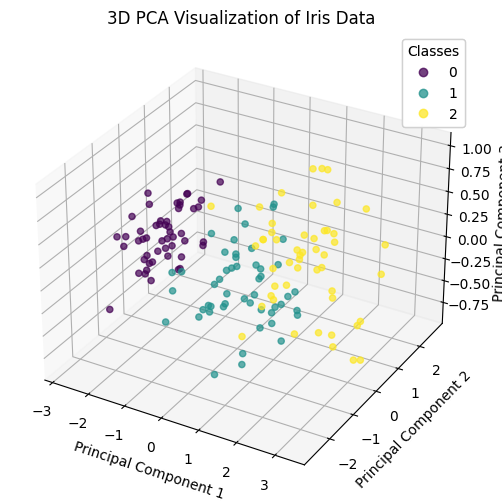

In [17]:
scaler = StandardScaler()
X_std = scaler.fit_transform(iris.data)

# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['target'] = iris.target

# Plot the PCA results in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['target'], cmap='viridis', alpha=0.7)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization of Iris Data')

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

**Standardize the Data**

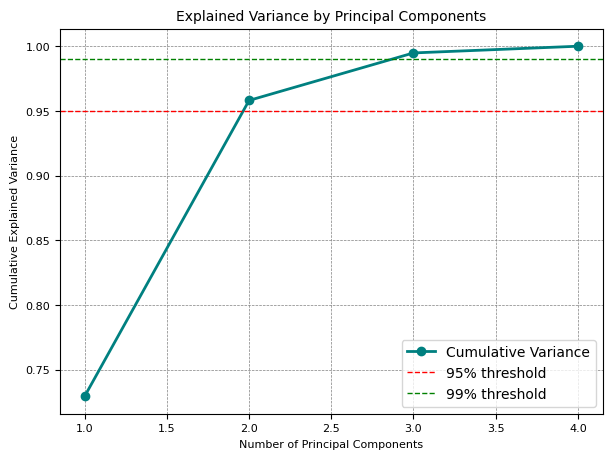

Explained variance by each component:  [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative explained variance:  [0.72962445 0.95813207 0.99482129 1.        ]


In [18]:
X = df[iris.feature_names].values
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='teal', linewidth=2)
plt.xlabel('Number of Principal Components', fontsize=8)
plt.ylabel('Cumulative Explained Variance', fontsize=8)
plt.title('Explained Variance by Principal Components', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.axhline(y=0.95, color='r', linestyle='--', linewidth=1)
plt.axhline(y=0.99, color='g', linestyle='--', linewidth=1)
plt.legend(['Cumulative Variance', '95% threshold', '99% threshold'], loc='lower right')
plt.show()

print("Explained variance by each component: ", explained_variance)
print("Cumulative explained variance: ", cumulative_explained_variance)


##Part2

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'], test_size=0.2, random_state=24)
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((120, 4), (120,), (30, 4), (30,))

scaling:

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model:

In [30]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', random_state=24)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

classification report and confusion matrix

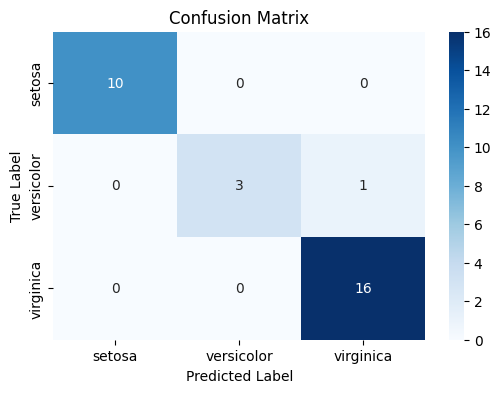

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.75      0.86         4
           2       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.96        30



In [31]:
classification_rep_svm_linear = classification_report(y_test,y_pred)

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_rep_svm_linear)

In [32]:
svm_linear.n_support_

array([ 2, 14, 11], dtype=int32)

In [33]:
svm_linear.support_vectors_

array([[-0.86820189,  0.58628227, -1.16195034, -0.90483067],
       [-1.61772871, -1.65428692, -1.39777959, -1.18539831],
       [ 0.25608833, -0.30994541,  0.48885437,  0.49800758],
       [ 1.13053628, -0.08588849,  0.78364093,  0.77857522],
       [-0.49343849, -0.08588849,  0.48885437,  0.49800758],
       [ 1.25545742, -0.53400233,  0.66572631,  0.35772375],
       [ 1.38037855,  0.13816843,  0.72468362,  0.49800758],
       [-0.86820189, -1.20617308, -0.3955053 , -0.06312772],
       [ 0.38100946, -0.30994541,  0.60676899,  0.35772375],
       [ 0.5059306 , -1.87834384,  0.48885437,  0.49800758],
       [ 0.88069401, -0.53400233,  0.54781168,  0.49800758],
       [-0.24359621, -0.08588849,  0.48885437,  0.49800758],
       [ 0.25608833, -0.75805924,  0.84259824,  0.6382914 ],
       [ 0.63085174,  0.58628227,  0.60676899,  0.6382914 ],
       [ 0.13116719,  0.36222535,  0.66572631,  0.91885905],
       [ 0.63085174, -1.65428692,  0.42989706,  0.21743993],
       [ 0.63085174, -0.

In [34]:
print('weights : ',svm_linear.coef_[0] , 'bias : ',svm_linear.intercept_[0])

weights :  [-0.42097348  0.34031402 -0.81606519 -0.90831698] bias :  -1.3352204521231705


***2D Decision Boundary after PCA***

In [57]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train )
X_test_pca = pca.transform(X_test)

svm_linear.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=24)

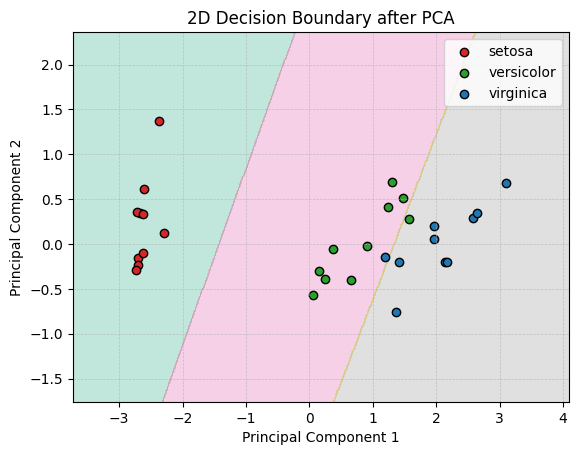

In [58]:
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set2)

colors = ['tab:red', 'tab:green', 'tab:blue']
target_names = iris.target_names
for i, color in zip(range(len(target_names)), colors):
    idx = np.where(y_test == i)
    plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], c=color, label=target_names[i], edgecolors='k')

plt.title('2D Decision Boundary after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

***2D Decision Boundary after LDA***

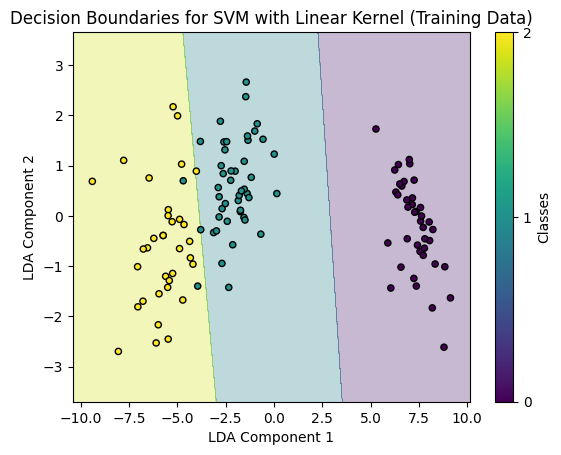

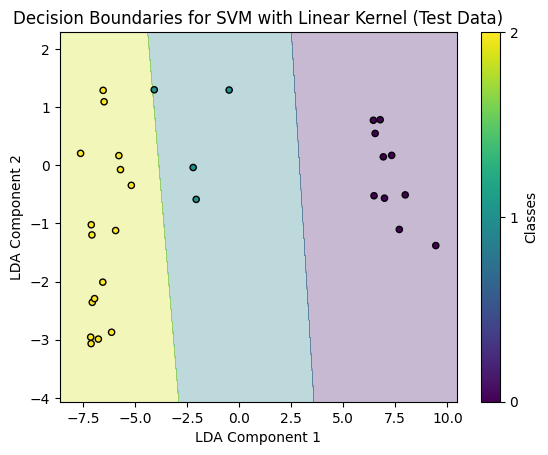

In [44]:
# Reduce dimensionality using LDA on the training data
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train SVM classifier with a linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train_lda, y_train)

# Predict using the trained classifier
y_test_pred = svm.predict(X_test_lda)

# # Obtain and print the confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report , accuracy_score
# conf_matrix = confusion_matrix(y_test, y_test_pred)
# cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=target_name)
# cmd.plot()
# plt.title('Confusion Matrix for SVM with Linear Kernel')
# plt.show()

# print(classification_report(y_test, y_test_pred, target_names=target_names))


# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title='Decision Boundaries'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.colorbar(scatter, ticks=range(len(target_names)), label='Classes')
    plt.title(title)
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.show()

# Draw decision boundaries on the training data
plot_decision_boundaries(X_train_lda, y_train, svm, title='Decision Boundaries for SVM with Linear Kernel (Training Data)')

# Draw decision boundaries on the test data
plot_decision_boundaries(X_test_lda, y_test, svm, title='Decision Boundaries for SVM with Linear Kernel (Test Data)')

##Part3

SVC with polynomial (degree 1) kernel: Accuracy = 1.000
SVC with polynomial (degree 2) kernel: Accuracy = 0.833
SVC with polynomial (degree 3) kernel: Accuracy = 0.933
SVC with polynomial (degree 4) kernel: Accuracy = 0.700
SVC with polynomial (degree 5) kernel: Accuracy = 0.900
SVC with polynomial (degree 6) kernel: Accuracy = 0.733
SVC with polynomial (degree 7) kernel: Accuracy = 0.833
SVC with polynomial (degree 8) kernel: Accuracy = 0.800
SVC with polynomial (degree 9) kernel: Accuracy = 0.833
SVC with polynomial (degree 10) kernel: Accuracy = 0.800


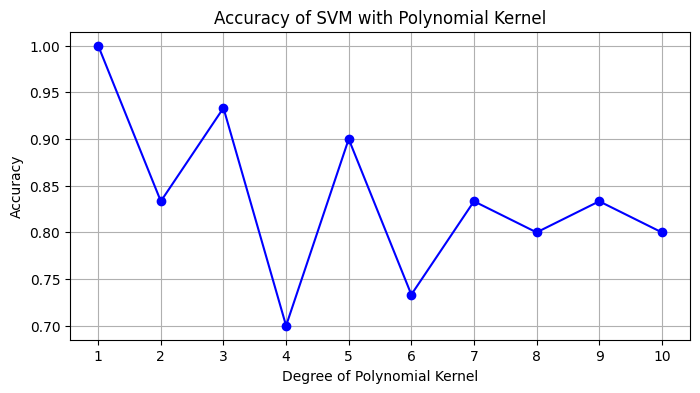

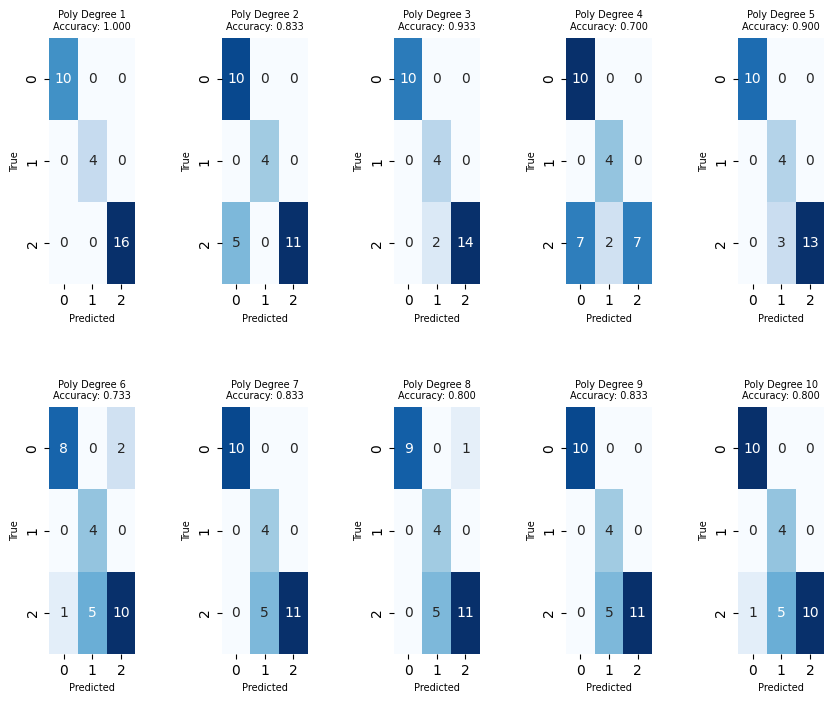

In [19]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

classifiers = [SVC(kernel='poly', degree=d, C=0.5) for d in range(1, 11)]

accuracies = []
degrees = range(1, 11)
conf_matrices = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

for degree, accuracy in zip(degrees, accuracies):
    print(f'SVC with polynomial (degree {degree}) kernel: Accuracy = {accuracy:.3f}')

plt.figure(figsize=(8, 4))
plt.plot(degrees, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy of SVM with Polynomial Kernel')
plt.xlabel('Degree of Polynomial Kernel')
plt.ylabel('Accuracy')
plt.xticks(degrees)
plt.grid(True)
plt.show()

fig, axes = plt.subplots(2, 5, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5, wspace=1)
for i, (conf_matrix, degree, ax) in enumerate(zip(conf_matrices, degrees, axes.flatten())):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'Poly Degree {degree}\nAccuracy: {accuracies[i]:.3f}', fontsize=7)
    ax.set_xlabel('Predicted', fontsize=7)
    ax.set_ylabel('True', fontsize=7)
plt.show()

**PCA**

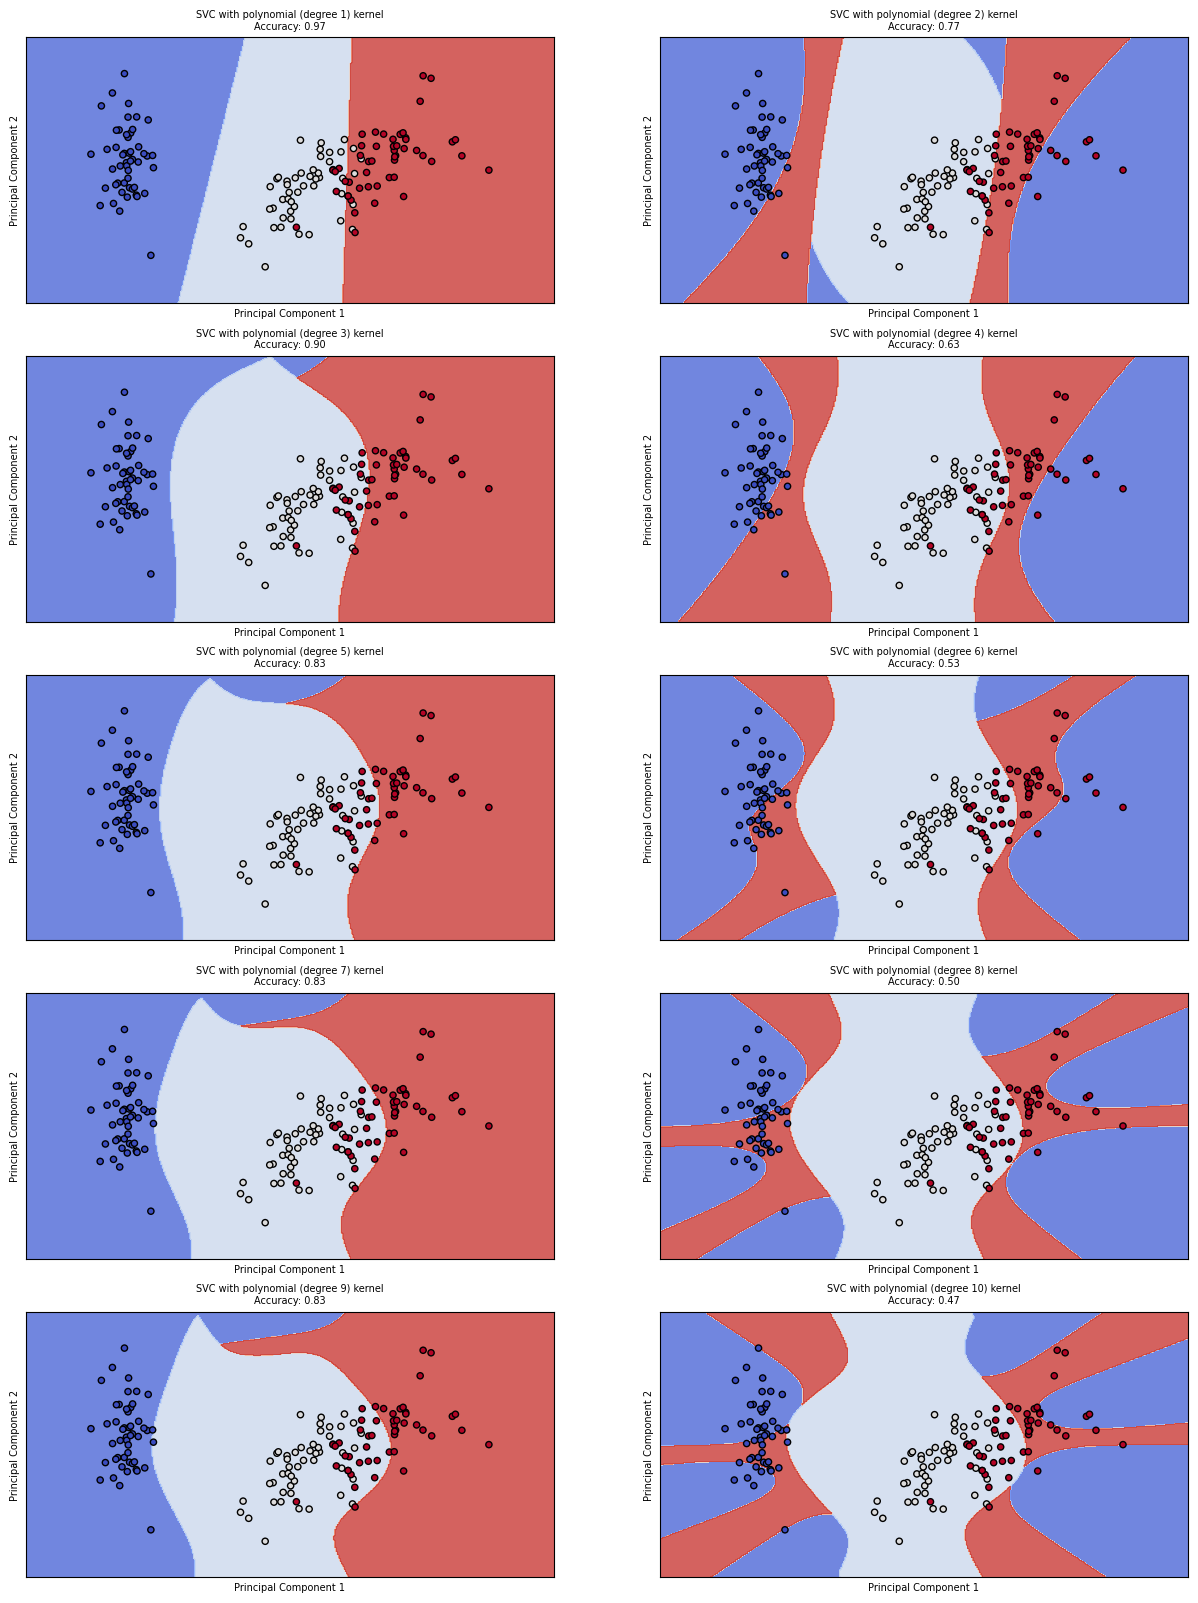

SVC with polynomial (degree 1) kernel: 0.97
SVC with polynomial (degree 2) kernel: 0.77
SVC with polynomial (degree 3) kernel: 0.90
SVC with polynomial (degree 4) kernel: 0.63
SVC with polynomial (degree 5) kernel: 0.83
SVC with polynomial (degree 6) kernel: 0.53
SVC with polynomial (degree 7) kernel: 0.83
SVC with polynomial (degree 8) kernel: 0.50
SVC with polynomial (degree 9) kernel: 0.83
SVC with polynomial (degree 10) kernel: 0.47


In [28]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reduce dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA components and the target
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Extract X and y from the DataFrame
X = df_pca[['PC1', 'PC2']].values
y = df_pca['target'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Define classifiers
classifiers = [
    SVC(kernel='poly', degree=1, C=0.5),
    SVC(kernel='poly', degree=2, C=0.5),
    SVC(kernel='poly', degree=3, C=0.5),
    SVC(kernel='poly', degree=4, C=0.5),
    SVC(kernel='poly', degree=5, C=0.5),
    SVC(kernel='poly', degree=6, C=0.5),
    SVC(kernel='poly', degree=7, C=0.5),
    SVC(kernel='poly', degree=8, C=0.5),
    SVC(kernel='poly', degree=9, C=0.5),
    SVC(kernel='poly', degree=10, C=0.5),
]

# Titles for the plots
titles = ['SVC with polynomial (degree 1) kernel',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with polynomial (degree 4) kernel',
          'SVC with polynomial (degree 5) kernel',
          'SVC with polynomial (degree 6) kernel',
          'SVC with polynomial (degree 7) kernel',
          'SVC with polynomial (degree 8) kernel',
          'SVC with polynomial (degree 9) kernel',
          'SVC with polynomial (degree 10) kernel',]

fig, sub = plt.subplots(5, 2, figsize=(15, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

accuracies = []

from matplotlib.font_manager import FontProperties
font_properties = FontProperties(size=7)

for clf, title, ax in zip(classifiers, titles, sub.flatten()):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Principal Component 1', fontproperties=font_properties)
    ax.set_ylabel('Principal Component 2', fontproperties=font_properties)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f"{title}\nAccuracy: {accuracy:.2f}", fontproperties=font_properties)

plt.show()

# Print accuracies
for title, accuracy in zip(titles, accuracies):
    print(f"{title}: {accuracy:.2f}")

**LDA**

Degree: 1
Accuracy: 1.00


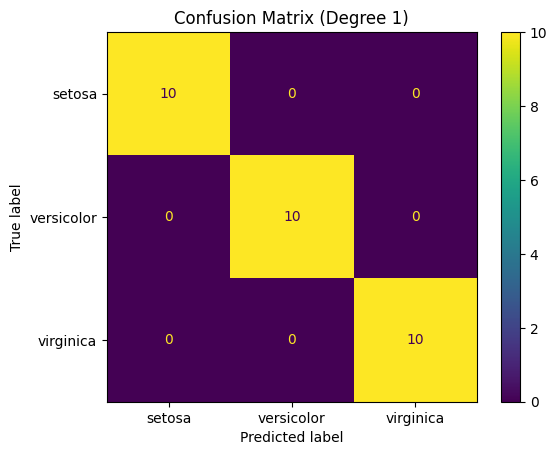

Degree: 2
Accuracy: 0.83


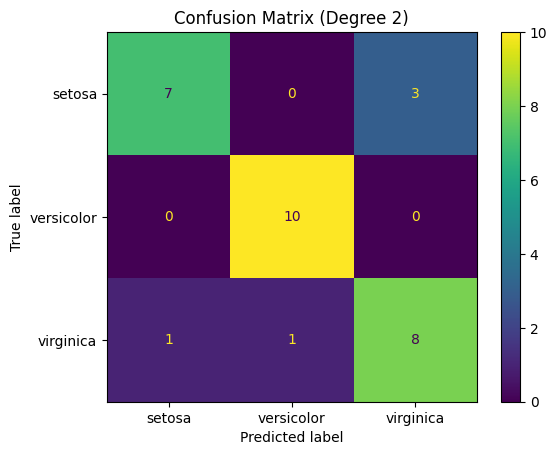

Degree: 3
Accuracy: 0.97


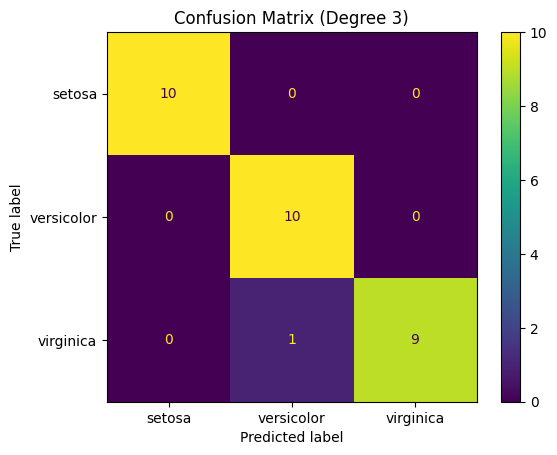

Degree: 4
Accuracy: 0.83


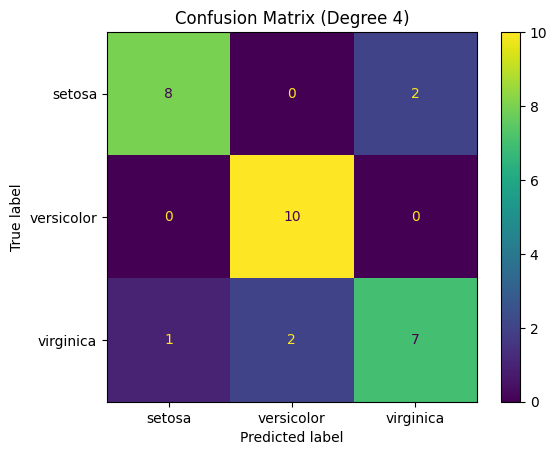

Degree: 5
Accuracy: 0.93


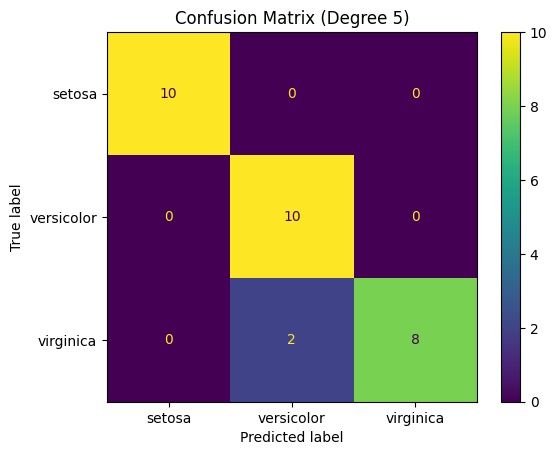

Degree: 6
Accuracy: 0.80


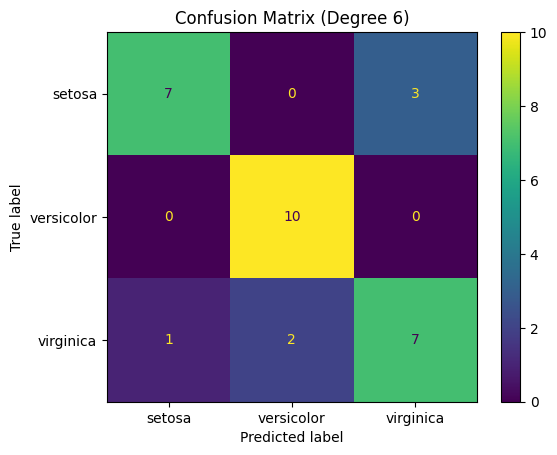

Degree: 7
Accuracy: 0.93


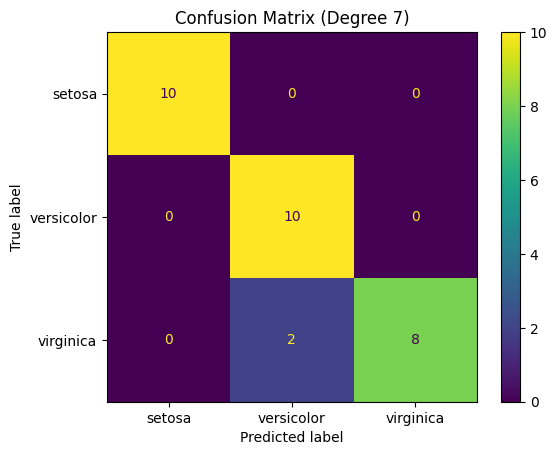

Degree: 8
Accuracy: 0.83


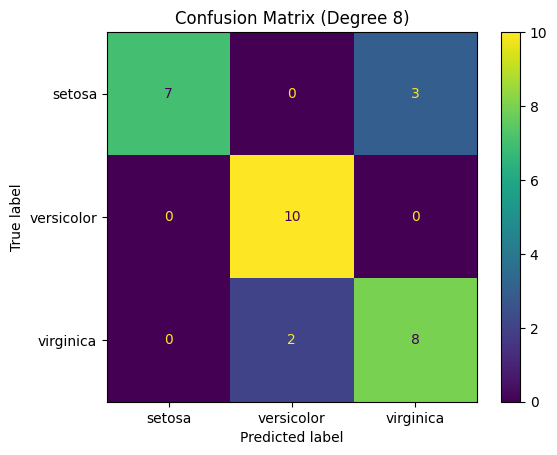

Degree: 9
Accuracy: 0.93


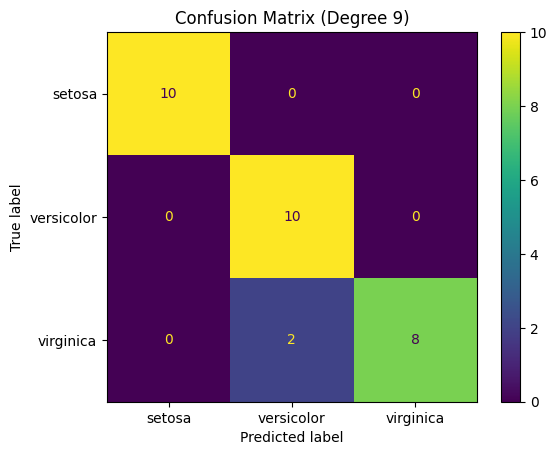

Degree: 10
Accuracy: 0.80


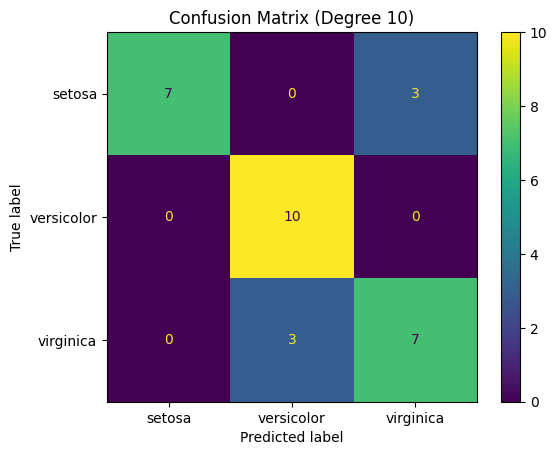

GIF created: decision_boundaries.gif


In [63]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
target = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=24, stratify=target)

# Reduce dimensionality using LDA on the training data
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Prepare to store results and images for the GIF
results = []
images = []

import imageio
# Function to plot decision boundaries and save the plot
def plot_decision_boundaries_and_save(X, y, model, degree, dataset_type='Training'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.colorbar(scatter, ticks=range(len(target_names)), label='Classes')
    plt.title(f'Decision Boundaries for SVM with Polynomial Kernel (Degree {degree}) ({dataset_type} Data)')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    filename = f'decision_boundary_degree_{degree}_{dataset_type}.png'
    plt.savefig(filename)
    plt.close()
    return filename

# Train and evaluate SVM with polynomial kernels of degrees 1 to 10
for degree in range(1, 11):
    svm_poly = SVC(kernel='poly', degree=degree)
    svm_poly.fit(X_train_lda, y_train)

    # Predict on test data
    y_test_pred = svm_poly.predict(X_test_lda)

    # Compute confusion matrix and accuracy
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    results.append((degree, conf_matrix, accuracy))

    # Plot and save decision boundaries for training data
    train_plot_file = plot_decision_boundaries_and_save(X_train_lda, y_train, svm_poly, degree, dataset_type='Training')
    images.append(imageio.imread(train_plot_file))

    # Plot and save decision boundaries for test data
    test_plot_file = plot_decision_boundaries_and_save(X_test_lda, y_test, svm_poly, degree, dataset_type='Test')
    images.append(imageio.imread(test_plot_file))

    # Display results
for degree, conf_matrix, accuracy in results:
    print(f'Degree: {degree}')
    print(f'Accuracy: {accuracy:.2f}')
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names)
    disp.plot(cmap='viridis')
    plt.title(f'Confusion Matrix (Degree {degree})')
    plt.show()

 # Create GIF from saved images with a slower frame duration
gif_filename = 'decision_boundaries.gif'
imageio.mimsave(gif_filename, images, duration=2)

# Provide link to GIF
print(f'GIF created: {gif_filename}')

***Gif***

https://drive.google.com/file/d/1vb5qFTFZ8wSsoAxpUhKUx_zvJeQ4e-tY/view?usp=sharing

In [29]:
import imageio
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from IPython.display import FileLink
from google.colab import drive

drive.mount('/content/drive')

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


image_files = []
for degree in range(1, 11):
    clf = SVC(kernel='poly', degree=degree, C=0.5)
    clf.fit(X_train, y_train)

    fig, ax = plt.subplots(figsize=(10, 8))
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f'SVC with polynomial (degree {degree}) kernel')

    filename = f"svc_poly_degree_{degree}.png"
    plt.savefig(filename)
    image_files.append(filename)
    plt.close()

images = []
for filename in image_files:
    images.append(imageio.imread(filename))

# Save GIF to Google Drive
gif_path = '/content/drive/MyDrive/svc_poly_degrees.gif'
imageio.mimsave(gif_path, images, duration=2)

print("GIF saved to Google Drive at:", gif_path)

#https://drive.google.com/file/d/1vb5qFTFZ8wSsoAxpUhKUx_zvJeQ4e-tY/view?usp=sharing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GIF saved to Google Drive at: /content/drive/MyDrive/svc_poly_degrees.gif


##Part4

***Using PCA***

In [46]:
import cvxopt
def linear_kernel( x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel( x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d

def gaussian_kernel( x, y, gamma=0.5):
    return np.exp(-gamma*np.linalg.norm(x - y) ** 2)

def sigmoid_kernel( x, y, alpha=1, C=0.01):
    a= alpha * np.dot(x, y) + C
    return np.tanh(a)

def SVM1(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    kernel_and_params=(kernel_type,poly_params, RBF_params, sigmoid_params,C)
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])
    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    elif kernel_type == 'RBF':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = gaussian_kernel(X[i], X[j], RBF_params)
    elif kernel_type == 'sigmoid':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = sigmoid_kernel(X[i], X[j], sigmoid_params[0], sigmoid_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    # solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    # Lagrange multipliers
    a = np.ravel(solution['x'])
    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5  # some small threshold

    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    numbers_of_sv=len(sv_y)
    # Bias (For linear it is the intercept):
    bias = 0
    for n in range(len(a)):
        # For all support vectors:
        bias += sv_y[n]
        bias -= np.sum(a * sv_y * K[ind[n], sv])
    bias = bias / (len(a)+0.0001)

    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    y_pred=0
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a ,sv_y, sv_x):
                # a : Lagrange multipliers, sv : support vectors.
                # Hypothesis: sign(sum^S a * y * kernel + b)

                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type=='RBF':
                    s += a1 * sv_y1 * gaussian_kernel(X_t[i], sv1, RBF_params)   # Kernel trick.
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
                if kernel_type == 'sigmoid':
                    s=+ a1 * sv_y1 *sigmoid_kernel( X_t[i],  sv1, sigmoid_params[0], sigmoid_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution,a, sv_x, sv_y, y_pred, kernel_and_params



def multiclass_svm(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    class_labels = list(set(y))

    classifiers = {}
    w_catch = {}  # catching w, b only for plot part
    b_catch = {}
    a_catch = {}
    sv_x_catch = {}
    sv_y_catch = {}

    for i, class_label in enumerate(class_labels):
        binary_y = np.where(y == class_label, 1.0, -1.0)
        w, bias, solution, a, sv_x, sv_y, prediction, kernel_and_params = SVM1(X, X_t, binary_y, C, kernel_type, poly_params, RBF_params, sigmoid_params)
        classifiers[class_label] = (w, bias, a, sv_x, sv_y, kernel_and_params)
        w_catch[class_label] = w
        b_catch[class_label] = bias
        a_catch[class_label] = a
        sv_x_catch[class_label] = sv_x
        sv_y_catch[class_label] = sv_y

    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[label]
            if w is not None:
                decision_scores[:, i] = np.dot(X_t, w) + bias
            else:
                decision_values = np.zeros(X_t.shape[0])
                for j in range(X_t.shape[0]):
                    s = 0
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        if kernel_type == 'linear':
                            s += a1 * sv_y1 * linear_kernel(X_t[j], sv1)
                        elif kernel_type == 'RBF':
                            s += a1 * sv_y1 * gaussian_kernel(X_t[j], sv1, RBF_params)
                        elif kernel_type == 'polynomial':
                            s += a1 * sv_y1 * polynomial_kernel(X_t[j], sv1, poly_params[0], poly_params[1])
                        elif kernel_type == 'sigmoid':
                            s += a1 * sv_y1 * sigmoid_kernel(X_t[j], sv1, sigmoid_params[0], sigmoid_params[1])
                    decision_values[j] = s
                decision_scores[:, i] = decision_values + bias
        return np.argmax(decision_scores, axis=1), kernel_and_params, w_catch, b_catch, classifiers

    return decision_function(X_t)

def visualize_multiclass_classification1(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack, epsilon=1e-10):
    plt.figure(figsize=(6, 4))
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            w = w_stack[i]
            bias = b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / (w[1] + epsilon)) * x_points - bias / (w[1] + epsilon)
            plt.plot(x_points, y_points, c='r', label='Decision Boundary')

    elif kernel_type == 'polynomial':
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z = np.zeros(xx.shape)
        for i in range(len(class_labels)):
            Z = np.zeros(xx.shape)
            for j in range(xx.shape[0]):
                for k in range(xx.shape[1]):
                    sample_point = np.array([xx[j, k], yy[j, k]])
                    decision_value = 0
                    w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[i]
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        decision_value += a1 * sv_y1 * polynomial_kernel(sample_point, sv1, C=kernel_and_params[1][0], d=kernel_and_params[1][1])
                    decision_value += bias
                    Z[j, k] = decision_value
            plt.contour(xx, yy, Z, levels=[0], colors='r')

    if trainset:
        plt.title('Data Points')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()

Training with polynomial degree 1
Degree: 1, Accuracy: 0.9666666666666667


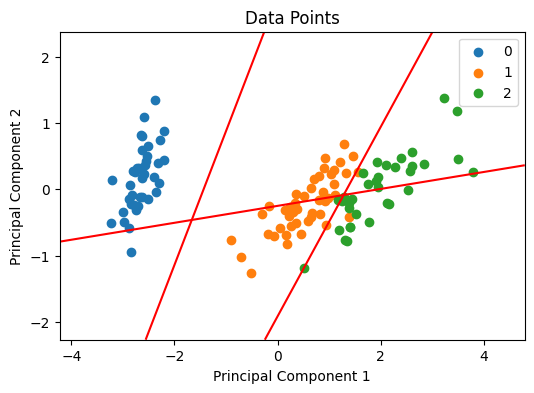

Training with polynomial degree 2
Degree: 2, Accuracy: 0.9666666666666667


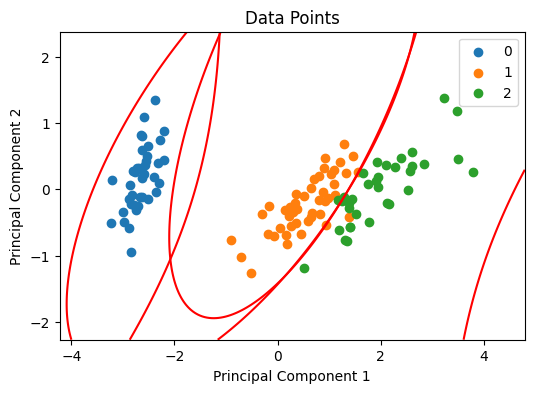

Training with polynomial degree 3
Degree: 3, Accuracy: 0.9666666666666667


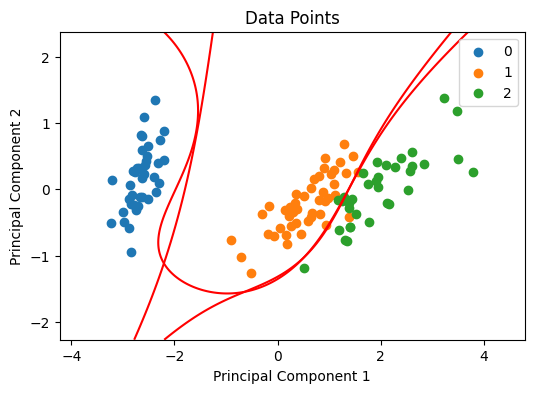

Training with polynomial degree 4
Degree: 4, Accuracy: 0.9666666666666667


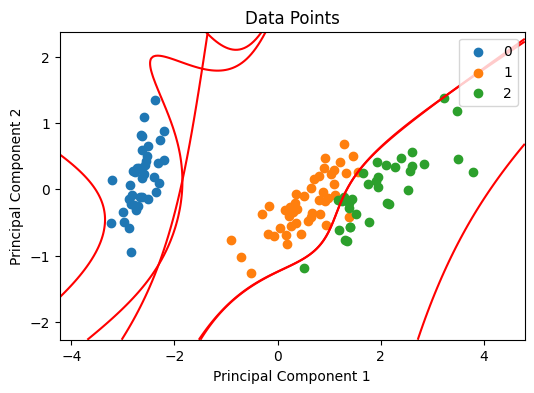

Training with polynomial degree 5
Degree: 5, Accuracy: 0.9666666666666667


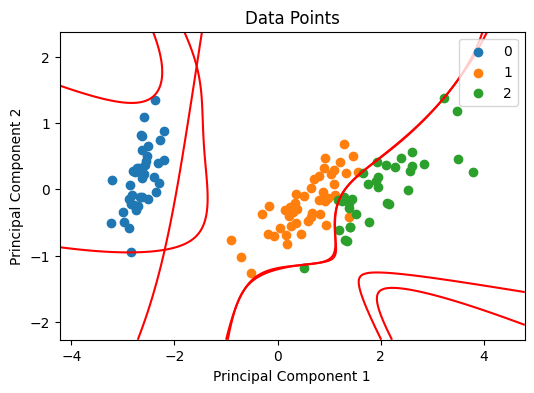

Training with polynomial degree 6
Degree: 6, Accuracy: 0.9666666666666667


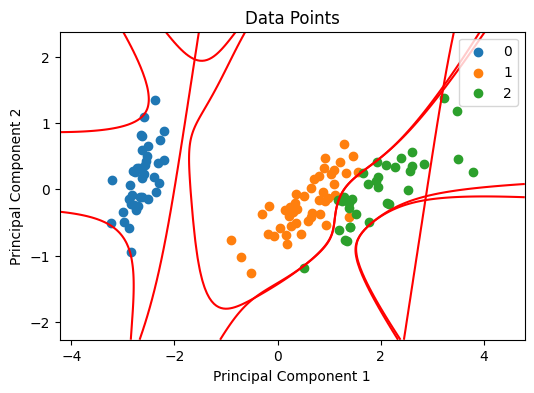

Training with polynomial degree 7
Degree: 7, Accuracy: 0.9666666666666667


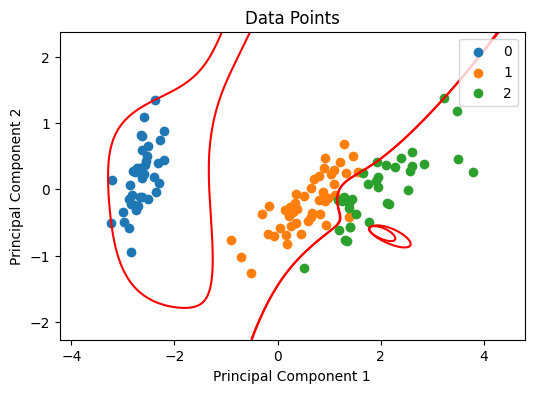

Training with polynomial degree 8
Degree: 8, Accuracy: 0.9666666666666667


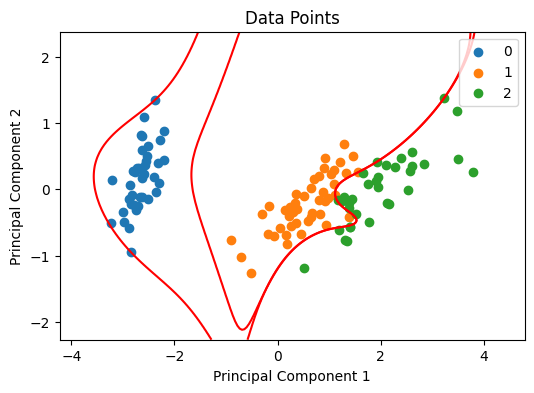

Training with polynomial degree 9
Degree: 9, Accuracy: 0.1


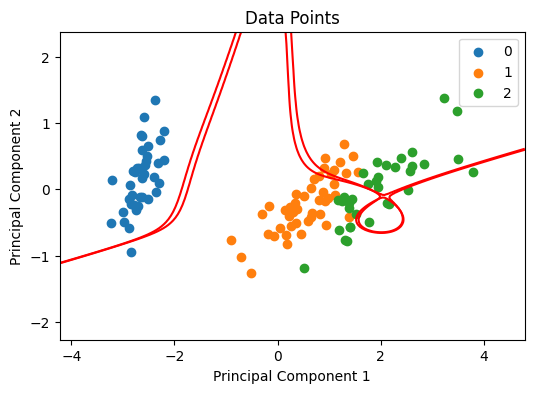

Training with polynomial degree 10
Degree: 10, Accuracy: 0.5666666666666667


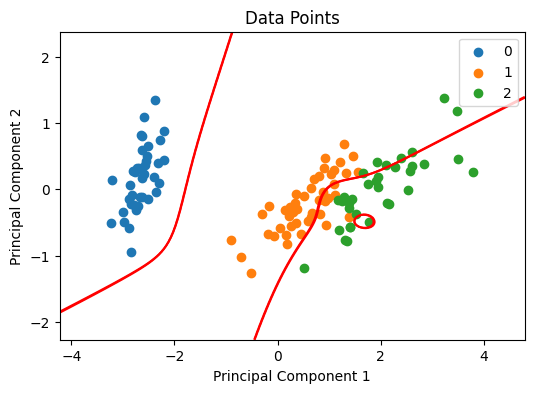

In [47]:
iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=24)

accuracies = []

for degree in range(1, 11):
    print(f"Training with polynomial degree {degree}")
    predictions, kernel_and_params, w_catch, b_catch, classifiers = multiclass_svm(
        X_train, X_test, y_train, C=1.0, kernel_type='polynomial', poly_params=(1.0, degree)
    )
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"Degree: {degree}, Accuracy: {accuracy}")

    visualize_multiclass_classification1(X_train, y_train, 'polynomial', True, classifiers, np.unique(y_train), w_catch, b_catch)

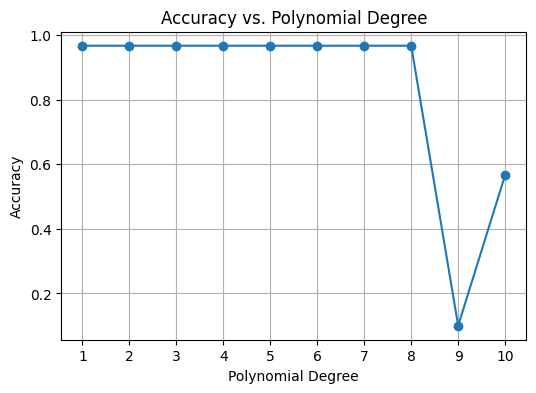

In [48]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Accuracy vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

***GIF***

https://drive.google.com/file/d/1vb5qFTFZ8wSsoAxpUhKUx_zvJeQ4e-tY/view?usp=sharing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training with polynomial degree 1
Degree: 1, Accuracy: 0.9666666666666667
Training with polynomial degree 2
Degree: 2, Accuracy: 0.9666666666666667
Training with polynomial degree 3
Degree: 3, Accuracy: 0.8666666666666667
Training with polynomial degree 4
Degree: 4, Accuracy: 0.8666666666666667
Training with polynomial degree 5
Degree: 5, Accuracy: 0.9
Training with polynomial degree 6
Degree: 6, Accuracy: 0.9333333333333333
Training with polynomial degree 7
Degree: 7, Accuracy: 0.8666666666666667
Training with polynomial degree 8
Degree: 8, Accuracy: 0.7333333333333333
Training with polynomial degree 9
Degree: 9, Accuracy: 0.1
Training with polynomial degree 10
Degree: 10, Accuracy: 0.5333333333333333
GIF saved to Google Drive at: /content/drive/MyDrive/svc_poly_degrees.gif


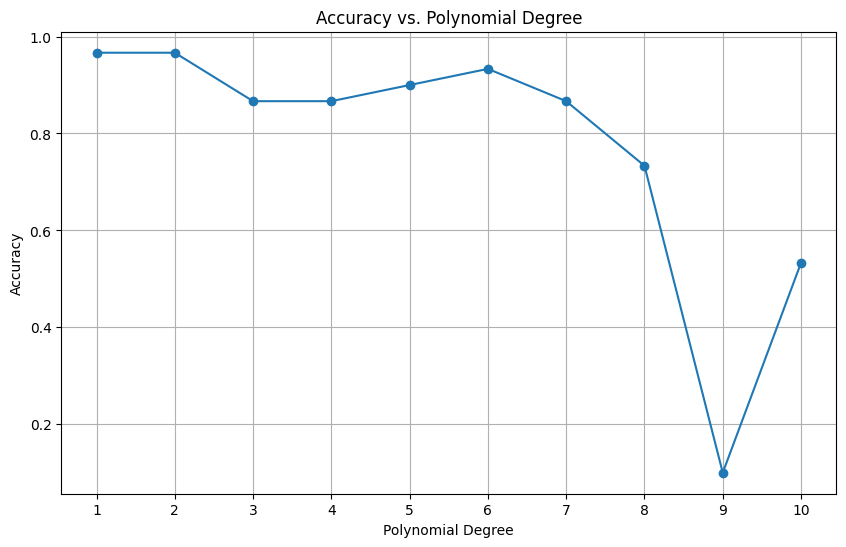

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import imageio
from google.colab import drive
from IPython.display import FileLink

# Mount Google Drive
drive.mount('/content/drive')

# Load and prepare the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Reduce to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Helper functions for meshgrid and plotting
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, classifiers, xx, yy, **params):
    Z = np.zeros(xx.shape)
    for label, clf in classifiers.items():
        Z += clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Custom visualization function for SVM
def visualize_multiclass_classification1(X_train, y_train1, kernel_type, classifiers, class_labels, w_stack, b_stack, epsilon=1e-10, ax=None):
    if ax is None:
        ax = plt.gca()

    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        ax.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            if w_stack[i] is None:
                continue
            w = w_stack[i]
            bias = b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / (w[1] + epsilon)) * x_points - bias / (w[1] + epsilon)
            ax.plot(x_points, y_points, c='r', label='Decision Boundary')

    elif kernel_type == 'polynomial':
        # Create a mesh grid
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z = np.zeros(xx.shape)
        for i in range(len(class_labels)):
            if i not in classifiers:
                continue
            Z = np.zeros(xx.shape)
            for j in range(xx.shape[0]):
                for k in range(xx.shape[1]):
                    sample_point = np.array([xx[j, k], yy[j, k]])
                    decision_value = 0
                    w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[i]
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        decision_value += a1 * sv_y1 * polynomial_kernel(sample_point, sv1, C=kernel_and_params[1][0], d=kernel_and_params[1][1])
                    decision_value += bias
                    Z[j, k] = decision_value
            ax.contour(xx, yy, Z, levels=[0], colors='r')

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()
    ax.set_xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    ax.set_ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)

# Train SVM with polynomial kernel of varying degrees and visualize results
image_files = []
accuracies = []

for degree in range(1, 11):
    print(f"Training with polynomial degree {degree}")
    predictions, kernel_and_params, w_catch, b_catch, classifiers = multiclass_svm(
        X_train, X_test, y_train, C=1.0, kernel_type='polynomial', poly_params=(1.0, degree)
    )
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"Degree: {degree}, Accuracy: {accuracy}")

    # Create mesh grid
    xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])

    # Plot decision boundaries
    fig, ax = plt.subplots(figsize=(10, 8))
    visualize_multiclass_classification1(X_train, y_train, 'polynomial', classifiers, np.unique(y_train), w_catch, b_catch, ax=ax)
    ax.set_title(f'Degree: {degree}, Accuracy: {accuracy:.2f}')

    filename = f"svc_poly_degree_{degree}.png"
    plt.savefig(filename)
    image_files.append(filename)
    plt.close()

# Create a GIF from the saved images
images = []
for filename in image_files:
    images.append(imageio.imread(filename))

# Save GIF to Google Drive
gif_path = '/content/drive/MyDrive/svc_poly_degrees.gif'
imageio.mimsave(gif_path, images, duration=2)

#https://drive.google.com/file/d/1vb5qFTFZ8wSsoAxpUhKUx_zvJeQ4e-tY/view?usp=sharing

print("GIF saved to Google Drive at:", gif_path)
FileLink(gif_path)


# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Accuracy vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

***Using LDA***

In [52]:
class SVM(object):
    def __init__(self, kernel='polynomial', C=0, gamma=1, degree=3):
        self.C = float(C)
        self.gamma = float(gamma)
        self.degree = int(degree)
        self.kernel = kernel

    def polynomial_kernel(self, x, y, C=1, d=3):
        return (np.dot(x, y) + C) ** d

    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.polynomial_kernel(X[i], X[j], self.C, self.degree)

        P = cvxopt.matrix(np.outer(y, y) * K + 1e+5 * np.identity(n_samples))
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y.astype(np.double), (1, n_samples), tc='d')
        b = cvxopt.matrix(0.0)

        if self.C == 0:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        cvxopt.solvers.options['show_progress'] = False
        cvxopt.solvers.options['abstol'] = 1e-10
        cvxopt.solvers.options['reltol'] = 1e-10
        cvxopt.solvers.options['feastol'] = 1e-10

        try:
            solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        except ValueError as e:
            print("Solver failed due to rank deficiency.")
            return False

        alphas = np.ravel(solution['x'])

        sv = alphas > 1e-10
        ind = np.arange(len(alphas))[sv]
        self.alphas = alphas[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        if len(self.alphas) > 0:
            self.b = 0
            for n in range(len(self.alphas)):
                self.b += self.sv_y[n]
                self.b -= np.sum(self.alphas * self.sv_y * K[ind[n], sv])
            self.b = self.b / len(self.alphas)
        else:
            self.b = 0

        if self.kernel == 'linear':
            self.w = np.zeros(n_features)
            for n in range(len(self.alphas)):
                self.w += self.alphas[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None
        return True

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.alphas, self.sv_y, self.sv):
                    s += a * sv_y * self.polynomial_kernel(X[i], sv, self.C, self.degree)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

In [53]:
def plotSVC(X, y, models, degree, dataset_type='Training'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max - x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)

    Z = np.zeros((xx.ravel().shape[0], len(models)))
    for i, model in enumerate(models):
        Z[:, i] = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.colorbar(scatter, ticks=range(len(target_names)), label='Classes')
    plt.title(f'Decision Boundaries for SVM with Polynomial Kernel (Degree {degree}) ({dataset_type} Data)')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    filename = f'decision_boundary_degree_{degree}_{dataset_type}.png'
    plt.savefig(filename)
    plt.close()
    return filename

In [67]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

Degree: 1, Accuracy: 0.33


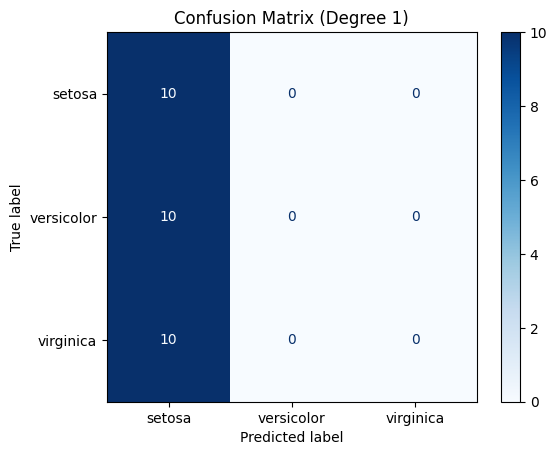

Degree: 2, Accuracy: 0.57


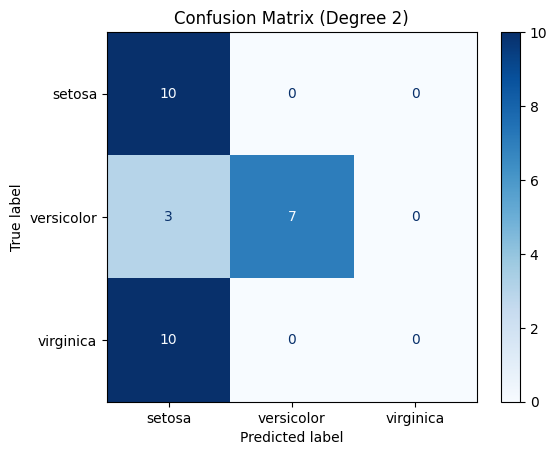

Degree: 3, Accuracy: 0.97


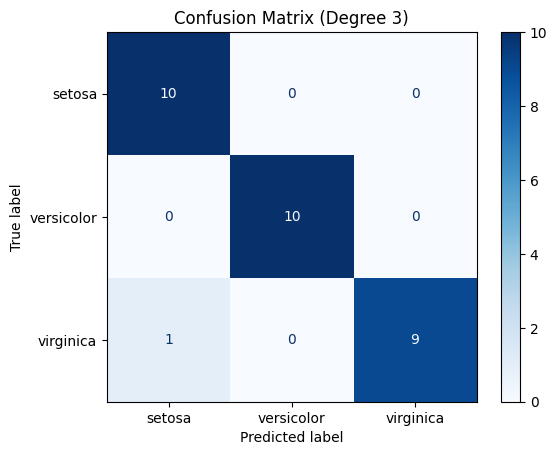

Degree: 4, Accuracy: 0.97


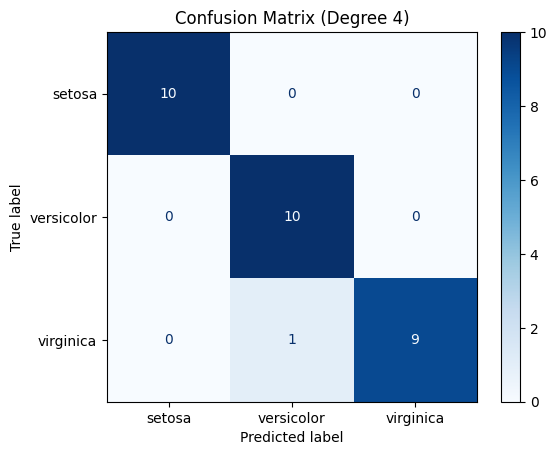

Degree: 5, Accuracy: 1.00


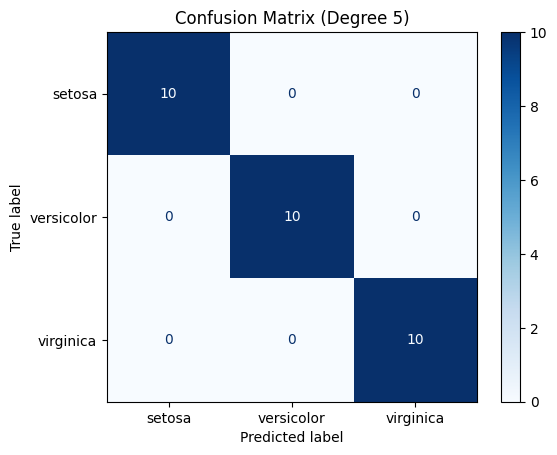

Degree: 6, Accuracy: 0.97


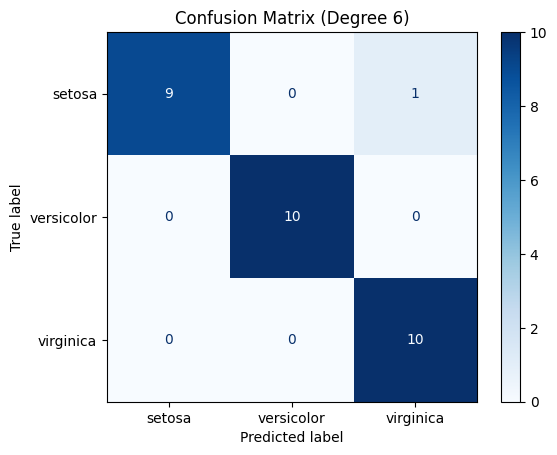

Degree: 7, Accuracy: 0.97


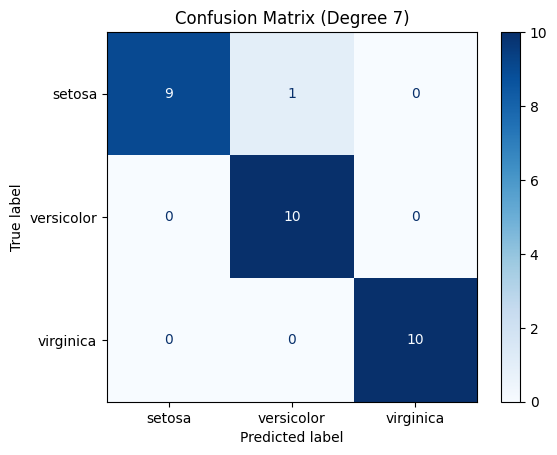

Degree: 8, Accuracy: 0.57


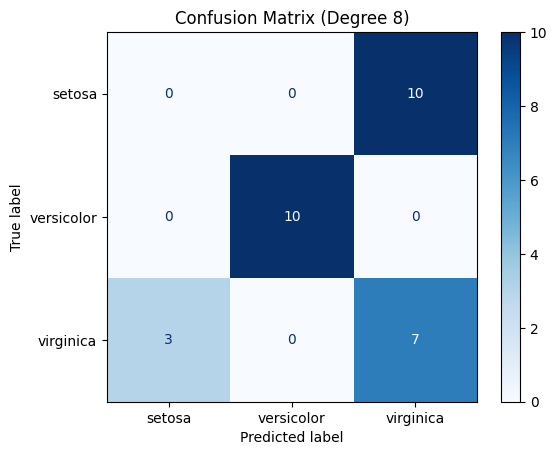

Degree: 9, Accuracy: 0.67


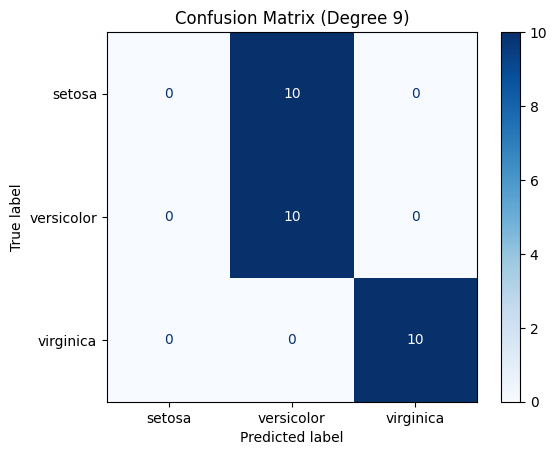

Degree: 10, Accuracy: 0.30


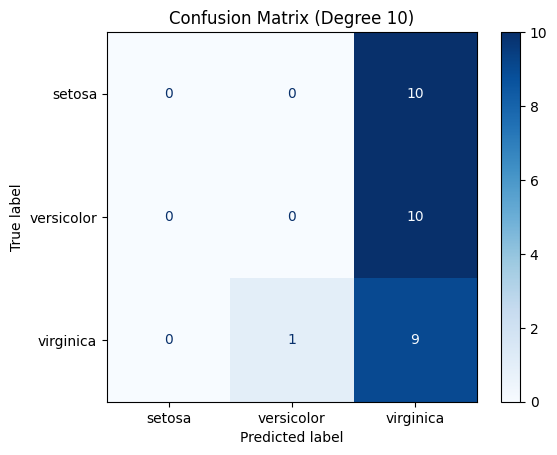

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report , accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=24, stratify=target)

# Reduce dimensionality using LDA on the training data
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

results = []
images = []


# One-vs-rest classification using polynomial kernels of degrees 1 to 10
for degree in range(1, 11):
    svm_models = []

    for i in range(len(target_names)):
        y_train_binary = np.where(y_train == i, 1, -1)
        svm = SVM(kernel='polynomial', degree=degree, C=1.0)
        svm.fit(X_train_lda, y_train_binary)
        svm_models.append(svm)


    # Plot and save decision boundaries for the training data
    filename = plotSVC(X_train_lda, y_train, svm_models, degree, 'Training')
    images.append(imageio.imread(filename))
    # Plot and save decision boundaries for the testing data
    filename = plotSVC(X_test_lda, y_test, svm_models, degree, 'Testing')
    images.append(imageio.imread(filename))

    y_test_pred = np.zeros(len(y_test))

    for i in range(len(target_names)):
        y_test_pred_binary = svm_models[i].predict(X_test_lda)
        y_test_pred[y_test_pred_binary == 1] = i

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Degree: {degree}, Accuracy: {accuracy:.2f}')

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (Degree {degree})')
    plt.show()

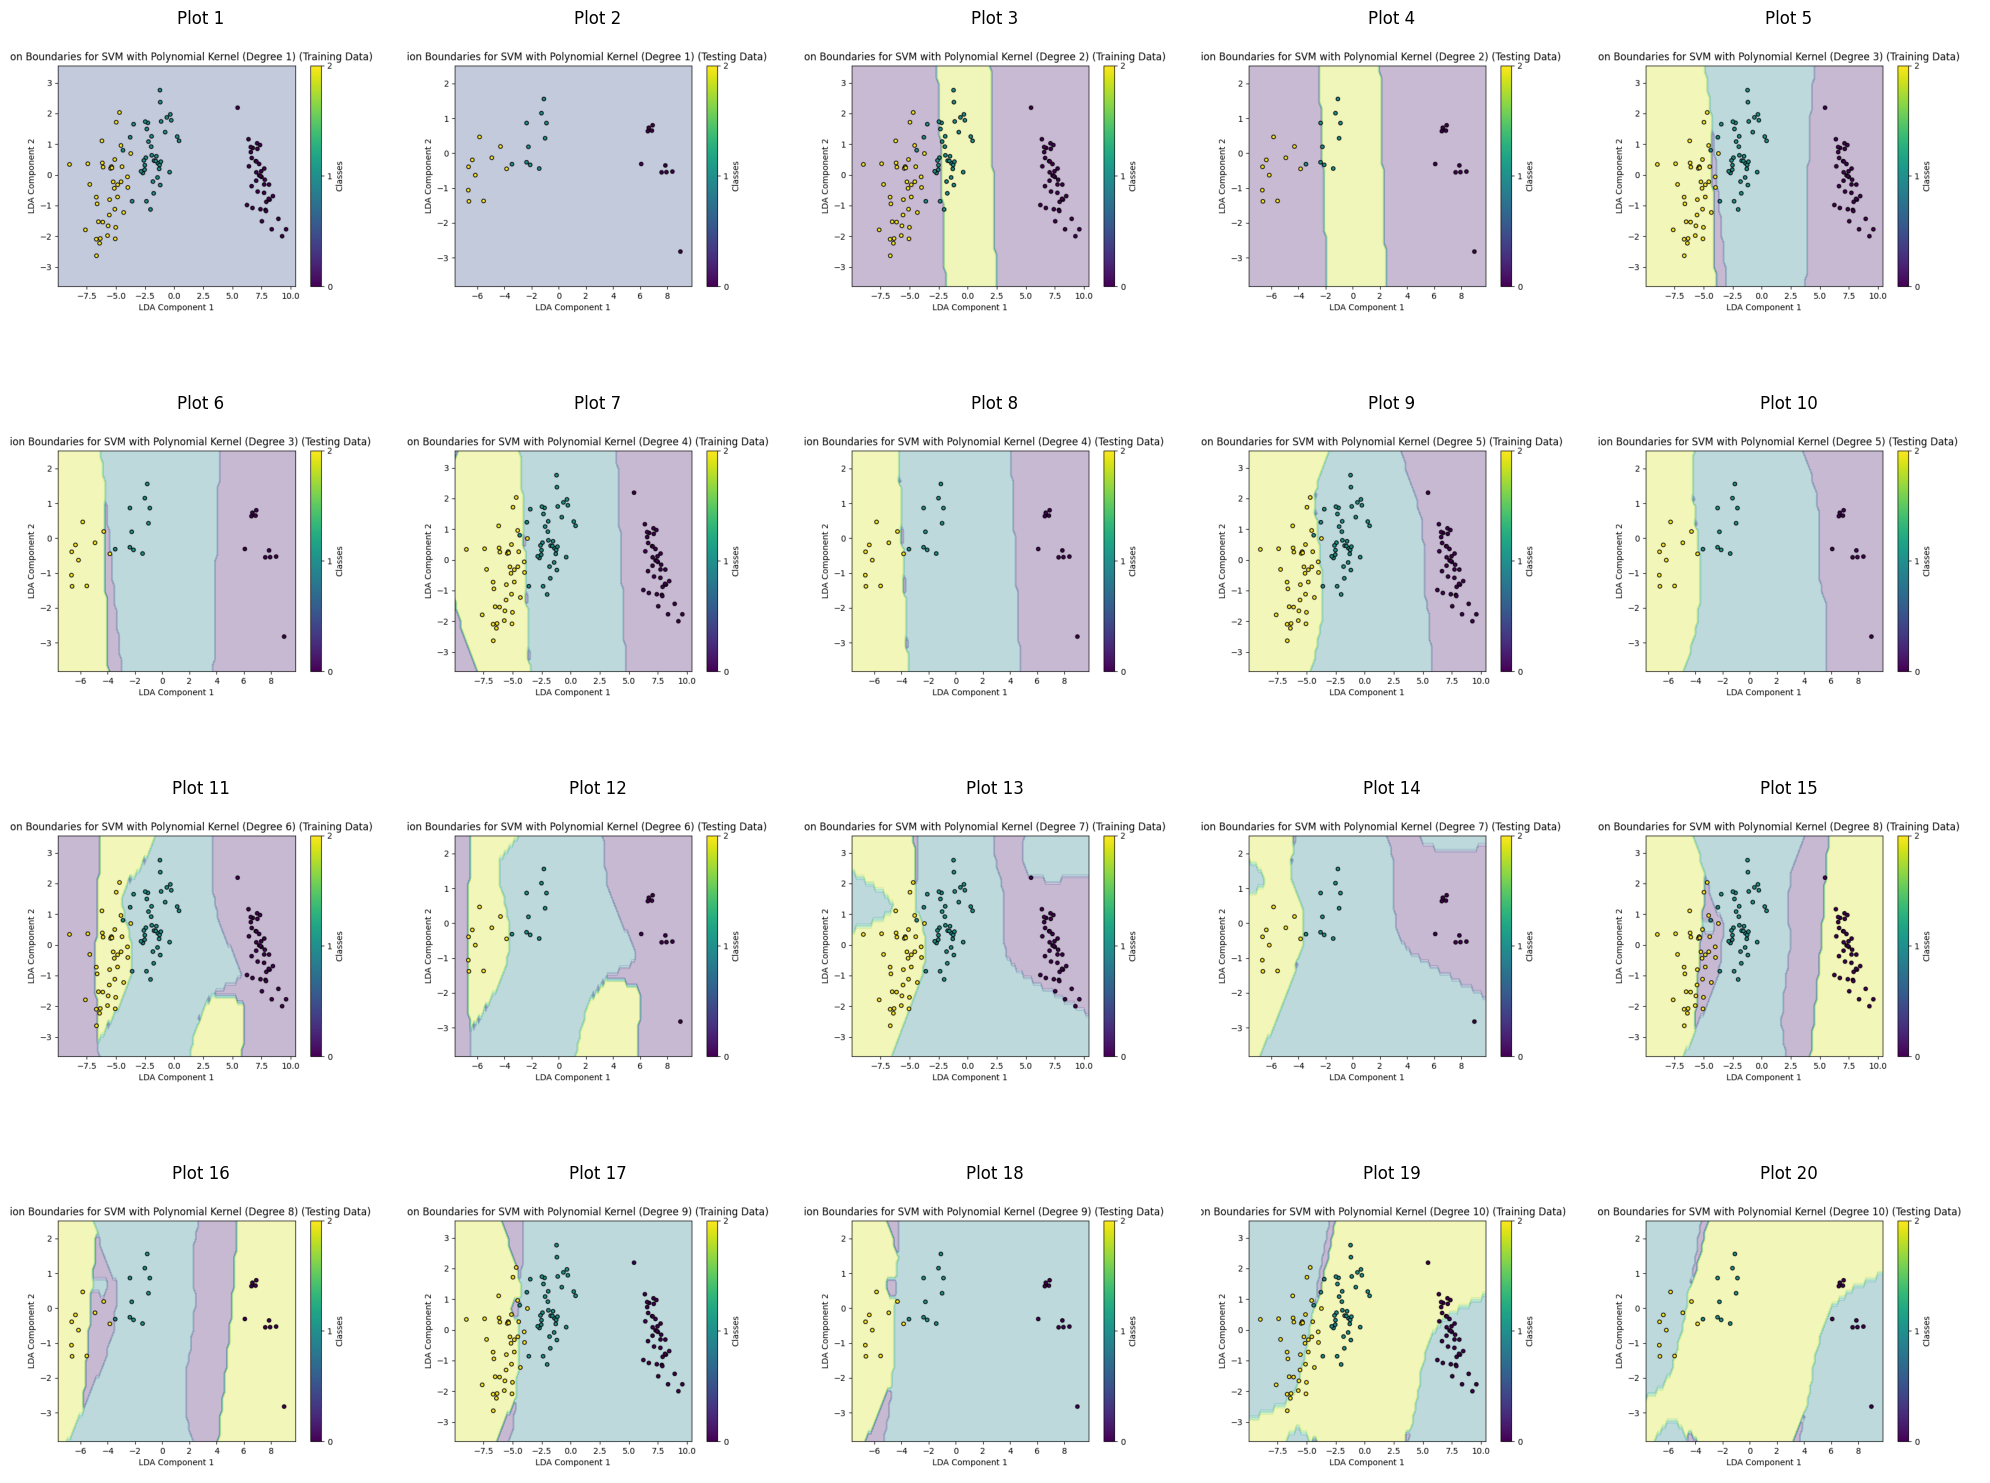

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

num_plots = len(images)

fig, axes = plt.subplots(4, 5, figsize=(20, 16))

for idx in range(min(num_plots, 20)):
    row = idx // 5
    col = idx % 5
    axes[row, col].imshow(images[idx])
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Plot {idx+1}')

plt.tight_layout()
plt.show()

#Question3

##Introduction

The dataset we're going to use can be downloaded from Kaggle. It contains data about credit card transactions that occurred during a period of two days, with 492 frauds out of 284,807 transactions.

There are only numerical variables. The data has been transformed using PCA transformation(s) due to confidentiality issues. The two features that haven't been changed are Time and Amount. Time contains the seconds elapsed between each transaction.

In [77]:
!pip install --upgrade --no-cach-dir gdown
! gdown 1fKb1DgSuG6Umup8xP6w_3RIXA3D4apcL


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From (original): https://drive.google.com/uc?id=1fKb1DgSuG6Umup8xP6w_3RIXA3D4apcL
From (redirected): https://drive.google.com/uc?id=1fKb1DgSuG6Umup8xP6w_3RIXA3D4apcL&confirm=t&uuid=b0c3c817-a2f0-404a-973b-79b7ea8eb306
To: /content/creditcard.csv
100% 151M/151M [00:03<00:00, 42.1MB/s]


In [78]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/HW3/creditcard.csv')
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

31 columns, 2 of which are Time and Amount. The rest are output from the PCA transformation. Let's check for missing values:

In [ ]:
df.isnull().sum().sum()

0

No missing value.

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import h5py

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1)

rcParams['figure.figsize'] = 8, 5

RANDOM_SEED = 24
LABELS = ["Normal", "Fraud"]

Text(0, 0.5, 'Frequency')

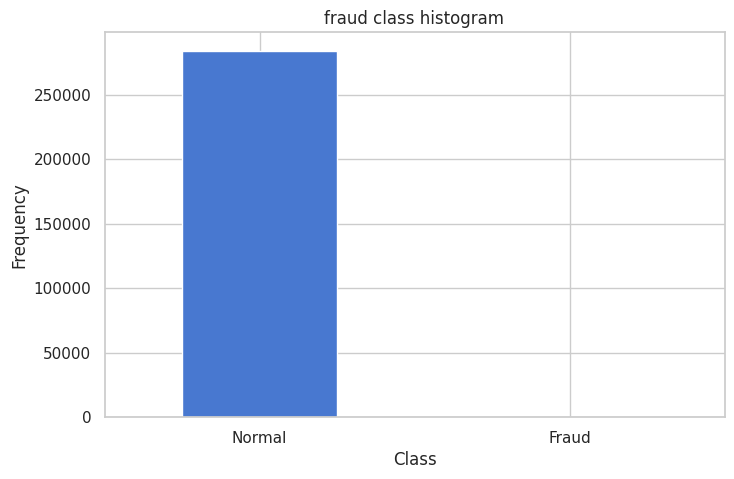

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar',rot = 0)
plt.title("fraud class histogram")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

We have a highly imbalanced dataset on our hands. Normal transactions overwhelm the fraudulent ones by a large margin. Let's look at the two types of transactions:

In [ ]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [ ]:
frauds.shape

(492, 31)

In [ ]:
normal.shape

(284315, 31)

How different are the amount of money used in different transaction classes?

In [ ]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

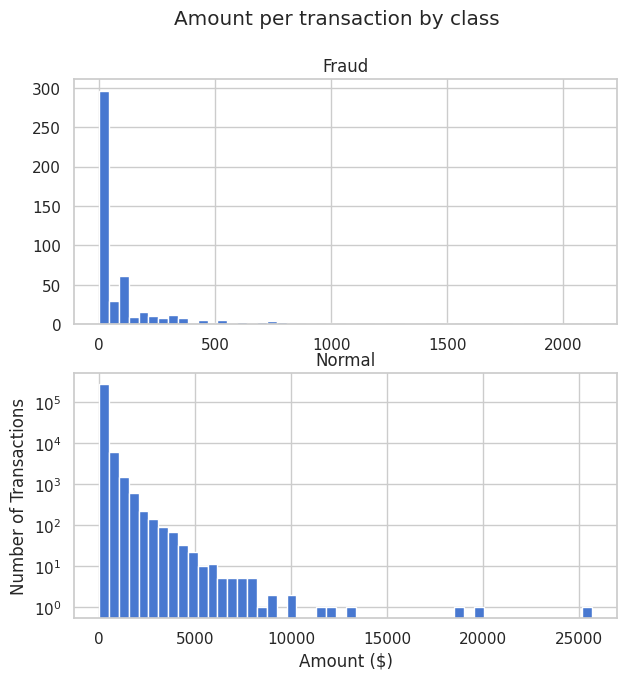

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize = (7,7))
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Do fraudulent transactions occur more often during certain time?

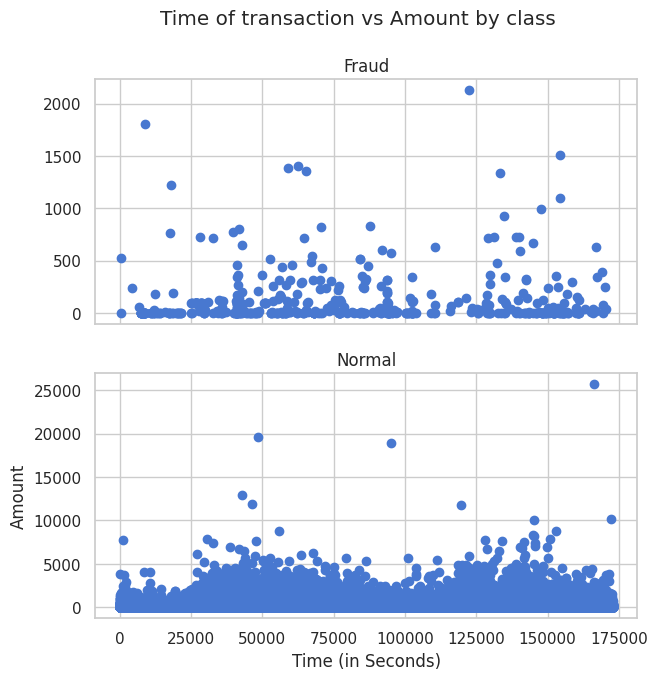

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (7,7))
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

*Doesn't seem like the time of transaction really matters.*

Correlation Matrix:
                  V1            V2            V3            V4            V5  \
V1      1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16  1.812612e-17   
V2      4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15  5.157519e-16   
V3     -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16 -6.539009e-17   
V4     -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00 -1.719944e-15   
V5      1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15  1.000000e+00   
V6     -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16  2.408382e-16   
V7     -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16  2.715541e-16   
V8     -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16  7.437229e-16   
V9     -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16  7.391702e-16   
V10     7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16 -5.202306e-16   
V11     2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16  7.203963e-16   
V12     2.053457e-16

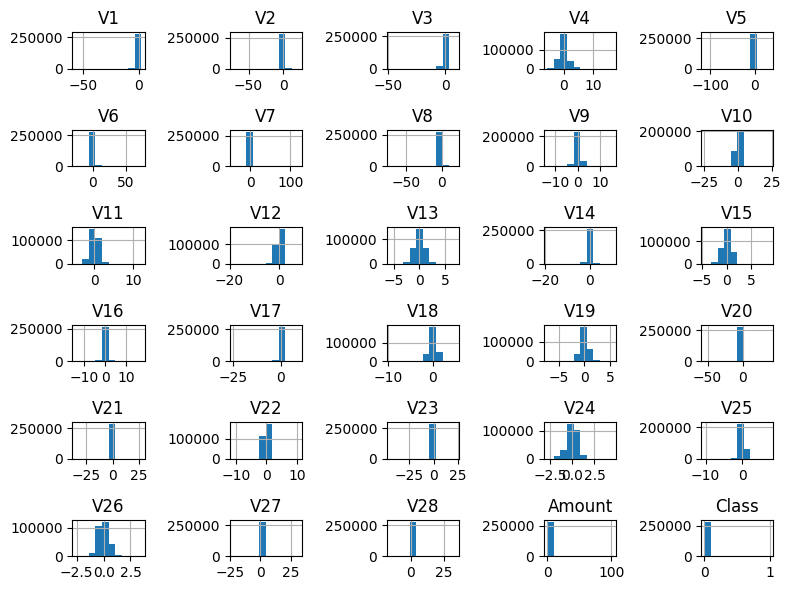

Descriptive Statistics:
                 V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15  2.239053e-15   
std    1.332271e+00  1.2370

In [100]:
dir()
# Calculate and print the correlation matrix
cor = df.corr()
print("Correlation Matrix:")
print(cor)

# Plot histograms for numeric columns
df.hist(figsize=(8, 6))
plt.tight_layout()
plt.show()

# Display descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# Display the first five rows
print("First Five Rows:")
print(df.head())

# Display general information about the DataFrame
print("DataFrame Info:")
print(df.info())

# Print the column names
print("Column Names:")
print(df.columns)

# Print the shape of the DataFrame
print("DataFrame Shape:")
print(df.shape)

##Part3

***preprocessing***

In [80]:
df.drop(['Time'], axis = 1, inplace = True)

sc = StandardScaler()
df['Amount'] = sc.fit_transform(df[['Amount']])

X = df.drop(['Class'], axis = 1)
y = df['Class']
X.shape, y.shape

((284807, 29), (284807,))

In [81]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=24) # 0.25 * 0.8 = 0.2

In [82]:
# Calculate percentages
train_percent = len(X_train) / len(X) * 100
val_percent = len(X_val) / len(X) * 100
test_percent = len(X_test) / len(X) * 100

# Display the shapes and percentages
shapes = {
    "X_train_shape": X_train.shape,
    "X_val_shape": X_val.shape,
    "X_test_shape": X_test.shape,
    "y_train_shape": y_train.shape,
    "y_val_shape": y_val.shape,
    "y_test_shape": y_test.shape
}

percentages = {
    "train_percent": train_percent,
    "val_percent": val_percent,
    "test_percent": test_percent
}
shapes, percentages

({'X_train_shape': (170883, 29),
  'X_val_shape': (56962, 29),
  'X_test_shape': (56962, 29),
  'y_train_shape': (170883,),
  'y_val_shape': (56962,),
  'y_test_shape': (56962,)},
 {'train_percent': 59.99957866204131,
  'val_percent': 20.000210668979342,
  'test_percent': 20.000210668979342})

**apply SMOTE exclusively on the training set**

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state =24)
X_train, y_train = smote.fit_resample(X_train, y_train)

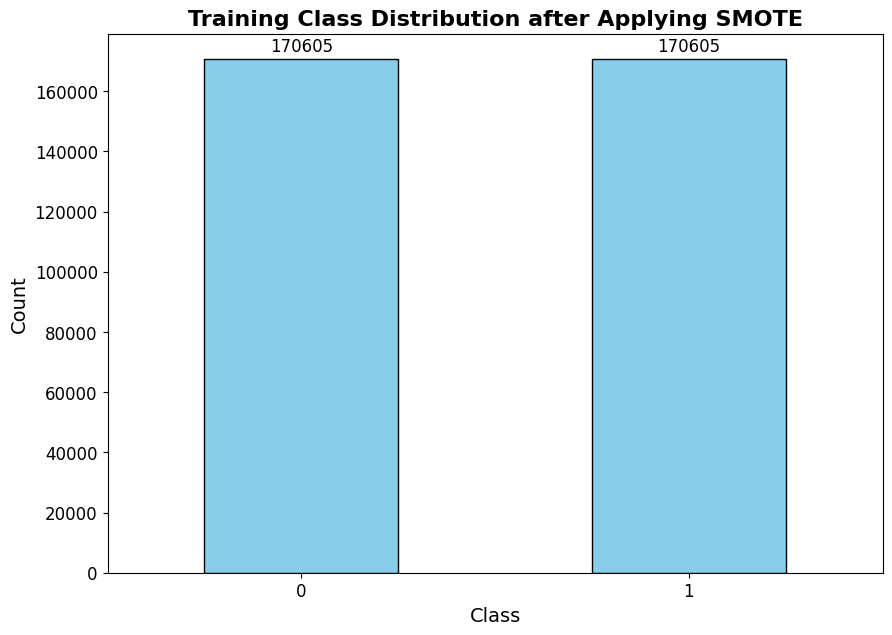

In [84]:
import matplotlib.pyplot as plt
class_counts = y_train.value_counts()

plt.figure(figsize=(10, 7))
bar_plot = class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Training Class Distribution after Applying SMOTE', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points',
                      fontsize=12)

plt.show()

In [85]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

**Introduce noise into the data**

In [86]:
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_val_noisy = X_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_val.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

**define the Autoencoder for denoising**

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Build the denoising autoencoder
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(22, activation='relu')(input_layer)
encoded = Dense(15, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
decoded = Dense(15, activation='relu')(encoded)
decoded = Dense(22, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Define checkpoint callback to save the best autoencoder model
autoencoder_checkpoint = ModelCheckpoint('best_autoencoder.h5', monitor='val_loss', save_best_only=True, mode='min')

# Train the autoencoder
autoencoder.fit(X_train_noisy,
                X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val),
                callbacks=[autoencoder_checkpoint],
                verbose = 1)

Epoch 1/50
1333/1333 [==============================] - 6s 4ms/step - loss: 14.0674 - val_loss: 0.9779
Epoch 2/50
1333/1333 [==============================] - 6s 5ms/step - loss: 13.9525 - val_loss: 0.9416
Epoch 3/50
1333/1333 [==============================] - 4s 3ms/step - loss: 13.9321 - val_loss: 0.9275
Epoch 4/50
1333/1333 [==============================] - 4s 3ms/step - loss: 13.9203 - val_loss: 0.9179
Epoch 5/50
1333/1333 [==============================] - 5s 4ms/step - loss: 13.9147 - val_loss: 0.9115
Epoch 6/50
1333/1333 [==============================] - 5s 4ms/step - loss: 13.9112 - val_loss: 0.9082
Epoch 7/50
1333/1333 [==============================] - 4s 3ms/step - loss: 13.9080 - val_loss: 0.9042
Epoch 8/50
1333/1333 [==============================] - 4s 3ms/step - loss: 13.8913 - val_loss: 0.8975
Epoch 9/50
1333/1333 [==============================] - 7s 5ms/step - loss: 13.8751 - val_loss: 0.8948
Epoch 10/50
1333/1333 [==============================] - 4s 3ms/step - lo

In [88]:
# Load the best autoencoder model
autoencoder.load_weights('best_autoencoder.h5')
# Denoise the training, validation, and test sets
X_train_denoised = autoencoder.predict(X_train_noisy)
X_val_denoised = autoencoder.predict(X_val_noisy)
X_test_denoised = autoencoder.predict(X_test_noisy)

1781/1781 [==============================] - 4s 2ms/step


In [89]:
X_train_denoised.shape, y_train.shape, y_val.shape

((341210, 29), (341210, 2), (56962, 2))

In [90]:
# Build the classification model
classifier_input = Input(shape=(input_dim,))
x = Dense(22, activation='relu')(classifier_input)
x = Dense(15, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(5, activation='relu')(x)
x = Dense(2, activation='softmax')(x)

classifier = Model(classifier_input, x)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define checkpoint callback to save the best classifier model
classifier_checkpoint = ModelCheckpoint('best_classifier.h5', monitor='val_loss', save_best_only=True, mode='min')

# Train the classifier
classifier.fit(X_train_denoised,
               y_train,
               epochs=50,
               batch_size=256,
               shuffle = True,
               validation_data=(X_val_denoised, y_val),
               callbacks=[classifier_checkpoint],
               verbose = 1)

Epoch 1/50
1333/1333 [==============================] - 8s 4ms/step - loss: 0.1214 - accuracy: 0.9533 - val_loss: 0.0728 - val_accuracy: 0.9722
Epoch 2/50
1333/1333 [==============================] - 4s 3ms/step - loss: 0.0716 - accuracy: 0.9712 - val_loss: 0.0612 - val_accuracy: 0.9767
Epoch 3/50
1333/1333 [==============================] - 4s 3ms/step - loss: 0.0635 - accuracy: 0.9748 - val_loss: 0.0739 - val_accuracy: 0.9718
Epoch 4/50
1333/1333 [==============================] - 6s 4ms/step - loss: 0.0593 - accuracy: 0.9769 - val_loss: 0.0663 - val_accuracy: 0.9738
Epoch 5/50
1333/1333 [==============================] - 4s 3ms/step - loss: 0.0561 - accuracy: 0.9785 - val_loss: 0.0479 - val_accuracy: 0.9821
Epoch 6/50
1333/1333 [==============================] - 4s 3ms/step - loss: 0.0538 - accuracy: 0.9794 - val_loss: 0.0561 - val_accuracy: 0.9782
Epoch 7/50
1333/1333 [==============================] - 5s 3ms/step - loss: 0.0522 - accuracy: 0.9802 - val_loss: 0.0440 - val_accuracy:

##Part4

Plot the confusion matrix on the test portion of the data and report the values of Recall ،Precision ،Accuracy and f1score:

1781/1781 [==============================] - 3s 2ms/step
Validation Set Metrics:
Accuracy   : 98.81%
F1 Score   : 0.99
Recall     : 0.99
Precision  : 1.00


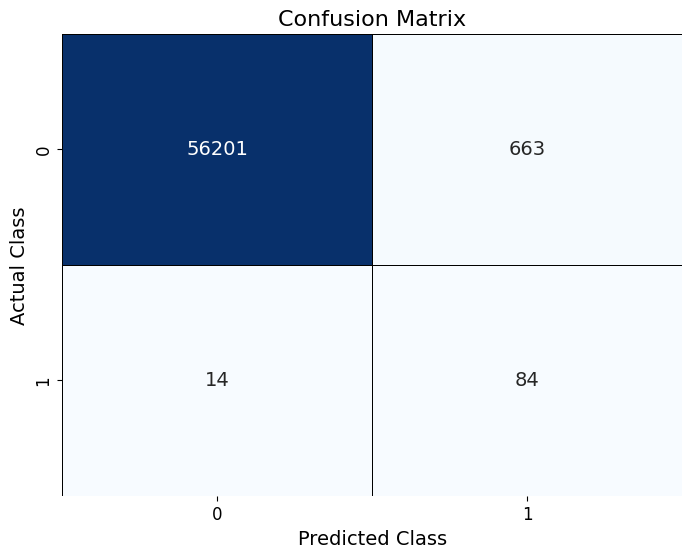

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import numpy as np

# Load the best classifier model
classifier.load_weights('best_classifier.h5')

# Predict on the denoised validation set
y_val_pred = classifier.predict(X_val_denoised)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Calculate metrics for the validation set
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
accuracy = accuracy_score(y_val_true_classes, y_val_pred_classes)
f1 = f1_score(y_val_true_classes, y_val_pred_classes, average='weighted')
recall = recall_score(y_val_true_classes, y_val_pred_classes, average='weighted')
precision = precision_score(y_val_true_classes, y_val_pred_classes, average='weighted')

# Print metrics
print(f'Validation Set Metrics:')
print(f'Accuracy   : {accuracy * 100:.2f}%')
print(f'F1 Score   : {f1:.2f}')
print(f'Recall     : {recall:.2f}')
print(f'Precision  : {precision:.2f}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, linewidths=.5, linecolor='black')
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

1781/1781 [==============================] - 3s 1ms/step
Accuracy: 98.80%
Precision: 1.00
Recall: 0.99
F1 Score: 0.99
Validation Set Metrics:
Accuracy   : 98.80%
F1 Score   : 0.99
Recall     : 0.99
Precision  : 1.00


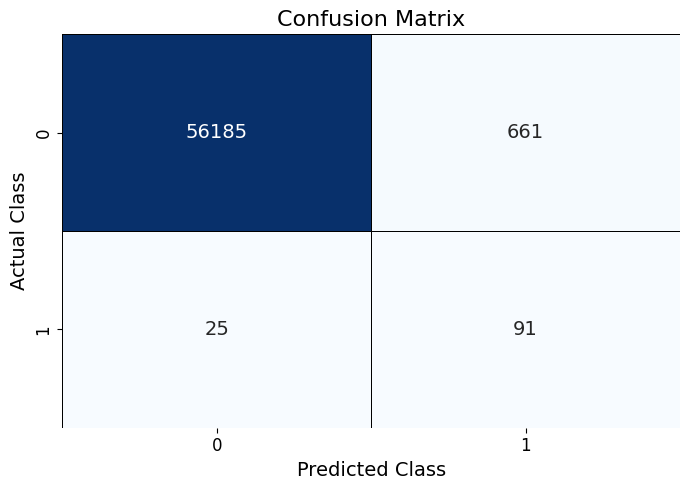

In [97]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best classifier model
classifier.load_weights('best_classifier.h5')

# Predict on the denoised test set
y_test_pred = classifier.predict(X_test_denoised)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_true_classes, y_test_pred_classes)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_true_classes, y_test_pred_classes, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print metrics
print(f'Validation Set Metrics:')
print(f'Accuracy   : {accuracy * 100:.2f}%')
print(f'F1 Score   : {f1:.2f}')
print(f'Recall     : {recall:.2f}')
print(f'Precision  : {precision:.2f}')

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, linewidths=.5, linecolor='black')
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [98]:
print(classification_report(y_test_true_classes, y_test_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56846
           1       0.12      0.78      0.21       116

    accuracy                           0.99     56962
   macro avg       0.56      0.89      0.60     56962
weighted avg       1.00      0.99      0.99     56962



##Part5

check the performance of the model with different thresholds for oversampling and draw a graph for this:

**different treshhods for the model**

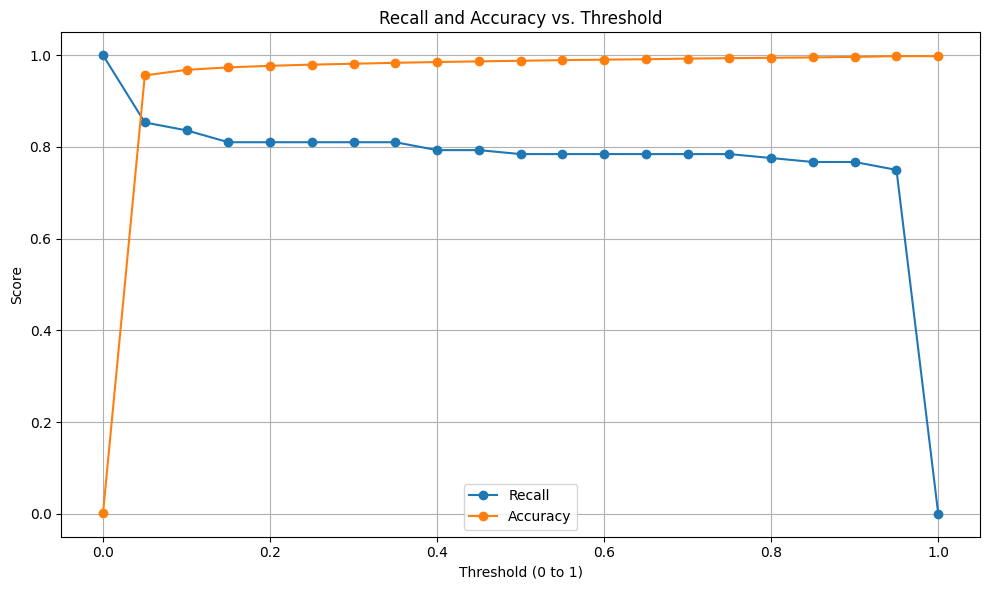

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score

# Generate thresholds from 0 to 1 with step 0.05
thresholds = np.arange(0.0, 1.05, 0.05)

# Initialize lists to store recall and accuracy values
recalls = []
accuracies = []

# Calculate recall and accuracy for each threshold
for threshold in thresholds:
    # Predict classes based on the threshold
    y_pred = (y_test_pred[:, 1] >= threshold).astype(int)

    # Calculate recall and accuracy
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

    # Append to lists
    recalls.append(recall)
    accuracies.append(accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, accuracies, label='Accuracy', marker='o')
plt.xlabel('Threshold (0 to 1)')
plt.ylabel('Score')
plt.title('Recall and Accuracy vs. Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**different sampling strategies for SMOTE**

In [102]:
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

Resampled dataset shape with strategy 0.1: (187665, 29) (187665, 2)
Epoch 1/20
734/734 [==============================] - 5s 4ms/step - loss: 3.4532 - val_loss: 1.0370
Epoch 2/20
734/734 [==============================] - 3s 4ms/step - loss: 3.3793 - val_loss: 1.0259
Epoch 3/20
734/734 [==============================] - 3s 3ms/step - loss: 3.3699 - val_loss: 1.0195
Epoch 4/20
734/734 [==============================] - 3s 4ms/step - loss: 3.3658 - val_loss: 1.0164
Epoch 5/20
734/734 [==============================] - 4s 6ms/step - loss: 3.3618 - val_loss: 1.0092
Epoch 6/20
734/734 [==============================] - 3s 4ms/step - loss: 3.3515 - val_loss: 1.0039
Epoch 7/20
734/734 [==============================] - 3s 4ms/step - loss: 3.3450 - val_loss: 0.9997
Epoch 8/20
734/734 [==============================] - 3s 4ms/step - loss: 3.3336 - val_loss: 0.9878
Epoch 9/20
734/734 [==============================] - 3s 4ms/step - loss: 3.3218 - val_loss: 0.9832
Epoch 10/20
734/734 [===========

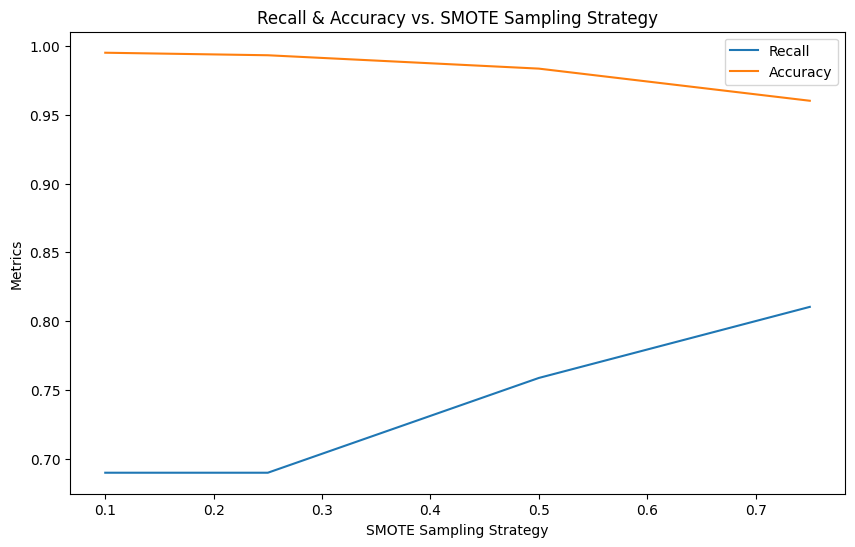

In [104]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=24) # 0.25 * 0.8 = 0.2

y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

sampling_strategies = [0.1, 0.25, 0.5, 0.75]

results = []

for strategy in sampling_strategies:
    # Apply SMOTE with the current sampling strategy
    smote = SMOTE(sampling_strategy=strategy, random_state=24)
    X_train_res, y_train_res = smote.fit_resample(X_train, np.argmax(y_train, axis=1))
    y_train_res = to_categorical(y_train_res, num_classes=2)

    print(f'Resampled dataset shape with strategy {strategy}:', X_train_res.shape, y_train_res.shape)

    # Adding Gaussian noise to the data
    def add_noise(data, noise_factor=0.2):
        noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
        noisy_data = np.clip(noisy_data, 0., 1.)
        return noisy_data

    X_train_noisy = add_noise(X_train_res)
    X_val_noisy = add_noise(X_val)

    # Define the autoencoder model
    input_dim = X_train_res.shape[1]
    encoding_dim = 10

    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    encoder = Dense(22, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(encoding_dim, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(22, activation="relu")(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(encoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the autoencoder
    autoencoder.fit(X_train_noisy, X_train_res,
                    epochs=20,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(X_val_noisy, X_val),
                    verbose=1)

    # Denoise the data
    X_train_denoised = autoencoder.predict(X_train_noisy)
    X_valid_denoised = autoencoder.predict(X_val_noisy)

    # Define the classifier model
    classifier_input = Input(shape=(input_dim,))
    classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
    classifier_layer = Dense(22, activation="relu")(classifier_layer)
    classifier_layer = Dense(15, activation="relu")(classifier_layer)
    classifier_layer = Dense(10, activation="relu")(classifier_layer)
    classifier_layer = Dense(5, activation="relu")(classifier_layer)
    classifier_layer = Dense(2, activation='softmax')(classifier_layer)  # Two neurons with softmax activation

    classifier = Model(inputs=classifier_input, outputs=classifier_layer)
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Categorical crossentropy loss

    # Train the classifier
    classifier.fit(X_train_denoised, y_train_res,
                   epochs=20,
                   batch_size=256,
                   shuffle=True,
                   validation_data=(X_val_denoised, y_val),
                   verbose=1)

    # Evaluate the classifier on the test set
    X_test_noisy = add_noise(X_test)
    X_test_denoised = autoencoder.predict(X_test_noisy)

    # Predict probabilities
    y_pred_prob = classifier.predict(X_test_denoised)

    # Define a fixed threshold for classification
    threshold = 0.5
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

    # Calculate recall and accuracy
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    results.append({'SMOTE Threshold': strategy, 'Recall Rate': recall, 'Accuracy': accuracy})

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plot recall and accuracy against SMOTE sampling strategies
plt.figure(figsize=(10, 6))
plt.plot(results_df['SMOTE Threshold'], results_df['Recall Rate'], label='Recall')
plt.plot(results_df['SMOTE Threshold'], results_df['Accuracy'], label='Accuracy')
plt.xlabel('SMOTE Sampling Strategy')
plt.ylabel('Metrics')
plt.title('Recall & Accuracy vs. SMOTE Sampling Strategy')
plt.legend()
plt.show()

##Part6

 training the model using unbalanced data and without autoencoder and oversampling:

**Developing the classifier**

Epoch 1/20
668/668 [==============================] - 4s 4ms/step - loss: 0.4516 - accuracy: 0.9873 - val_loss: 0.2819 - val_accuracy: 0.9983
Epoch 2/20
668/668 [==============================] - 2s 4ms/step - loss: 0.1991 - accuracy: 0.9984 - val_loss: 0.1393 - val_accuracy: 0.9983
Epoch 3/20
668/668 [==============================] - 3s 5ms/step - loss: 0.1061 - accuracy: 0.9984 - val_loss: 0.0808 - val_accuracy: 0.9983
Epoch 4/20
668/668 [==============================] - 3s 4ms/step - loss: 0.0648 - accuracy: 0.9984 - val_loss: 0.0523 - val_accuracy: 0.9983
Epoch 5/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0435 - accuracy: 0.9984 - val_loss: 0.0367 - val_accuracy: 0.9983
Epoch 6/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0315 - accuracy: 0.9984 - val_loss: 0.0276 - val_accuracy: 0.9983
Epoch 7/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0228 - accuracy: 0.9986 - val_loss: 0.0173 - val_accuracy: 0.9991
Epoch 

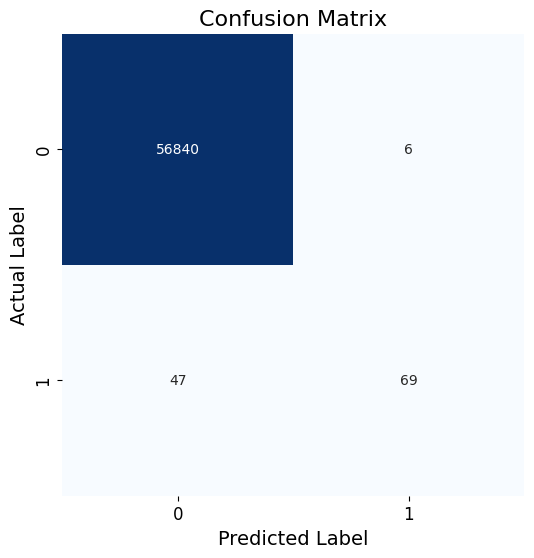

In [105]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/HW3/creditcard.csv')

# Drop 'TIME' and normalize 'AMOUNT'
df = df.drop(columns=['Time'])
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Split features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split into train, validation, and test sets (60%, 20%, 20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=24)  # 0.25 * 0.8 = 0.2

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Add Gaussian noise to the data
def add_noise(data, noise_factor=0.2):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data

X_train_noisy = add_noise(X_train)
X_val_noisy = add_noise(X_val)
X_test_noisy = add_noise(X_test)

# Define the classifier model
input_dim = X_train.shape[1]
classifier_input = Input(shape=(input_dim,))
classifier_layer = Dense(22, activation="relu")(classifier_input)
classifier_layer = Dense(15, activation="relu")(classifier_layer)
classifier_layer = Dense(10, activation="relu")(classifier_layer)
classifier_layer = Dense(5, activation="relu")(classifier_layer)
classifier_layer = Dense(2, activation='softmax')(classifier_layer)

classifier = Model(inputs=classifier_input, outputs=classifier_layer)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
classifier.fit(X_train_noisy, y_train,
               epochs=20,
               batch_size=256,
               shuffle=True,
               validation_data=(X_val_noisy, y_val),
               verbose=1)

# Predict probabilities on the test set
y_pred_prob = classifier.predict(X_test_noisy)

# Define a fixed threshold for classification
threshold = 0.5
y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

# Calculate recall, accuracy, F1 score, precision, and confusion matrix
recall = recall_score(np.argmax(y_test, axis=1), y_pred)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
f1 = f1_score(np.argmax(y_test, axis=1), y_pred)
precision = precision_score(np.argmax(y_test, axis=1), y_pred)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Print metrics
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(classification_report(np.argmax(y_test, axis=1), y_pred))

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming conf_matrix is your confusion matrix variable
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**sweeping treshhold**

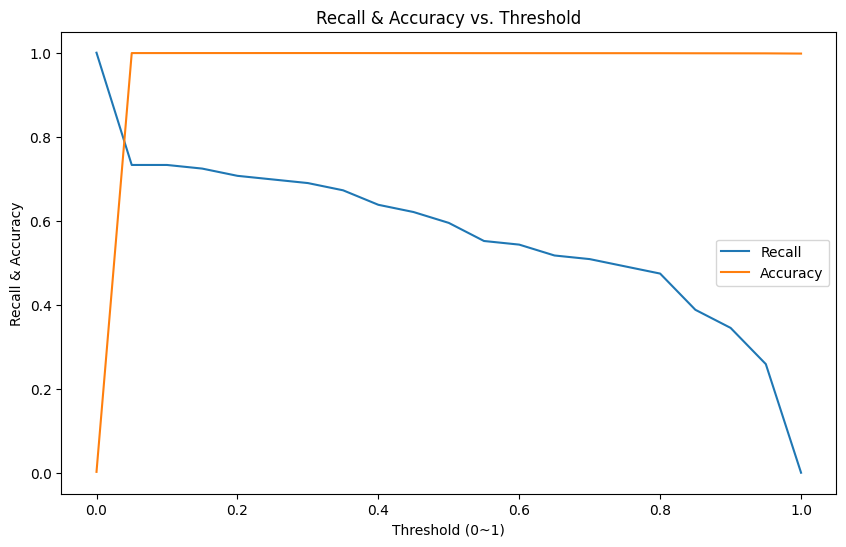

In [108]:
# Sweep the threshold and calculate recall and accuracy
thresholds = np.arange(0.0, 1.05, 0.05)
recalls = []
accuracies = []

for threshold in thresholds:
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    recalls.append(recall)
    accuracies.append(accuracy)

# Plot recall and accuracy against thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold (0~1)')
plt.ylabel('Recall & Accuracy')
plt.title('Recall & Accuracy vs. Threshold')
plt.legend()
plt.show()